# Load libraries

In [4]:
import sys
sys.path.append('../../utils/')

from DarioFunctions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

scaler = StandardScaler()
nIter = 50
nprocess = 10

opsins = ['opn1lw1', 'opn1lw2', 'opn1mw1', 'opn1mw2','opn1mw3','opn1mw4','opn1sw1','opn1sw2', 'rhol', # zebrafish
          'OPN1SW', 'OPN2SW', 'OPN1MSW', 'OPN1LW', 'RHO', # chicken
          'LOC132767847', 'LOC132773706','LOC132767849', 'OPN1SW', 'RHO', # lizard 
          'ENSSTOG00000024701', 'OPN1SW', 'RHO' # squirrel
          'OPN1LW', 'OPN1SW', 'RHO'] # human


/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load pre-computed homology graph

In [5]:
sm_ref = samap.utils.load_samap("../../../storage/samap/pkl/sm_pmNCBI_zeENS_chNCBI_liNCBI_opNCBI_sqENS_hsENS.samap")
gnnm = (sm_ref.gnnm, sm_ref.gns, sm_ref.gns_dict)

# Output files directory

In [3]:
# os.mkdir('MappingTables')
# os.mkdir('MappingTables/five_species')
# os.mkdir('MappingTables/five_species_no_rods')
# os.mkdir('MappingTables/zechli')
# os.mkdir('MappingTables/swap')
# os.mkdir('MappingTables/swap_no_opsins')
# os.mkdir('MappingTables/swap_animaltfdb')

# Zebrafish, chick and lizard

## Whole transcriptome (Figure 3C)

In [4]:
path = '../../Species_Objects/Cone_Objects/updated/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
identlist = ['ze', 'ch', 'li']
zechli_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
zechli_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
zechli_double

{'ze': '../../Species_Objects/Cone_Objects/updated/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/updated/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/updated/Lizard_double.h5ad'}

In [5]:
def wrapper(seed, downsample):
    return SAMapTrial(zechli_double, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes = nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM



Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0RUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0



Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9369726789764383
Iteration: 1, Convergence: 0.9355002011065987Iteration: 1, Convergence: 0.9364806246086416
Iteration: 1, Convergence: 0.9363821222877017
Iteration: 1, Convergence: 0.936770800565559

Iteration: 1, Convergence: 0.9363068553597385Iteration: 1, Convergence: 0.9371355414019873Iteration: 1, Convergence: 0.9370027139276473


Iteration: 1, Convergence: 0.9373505123432739Iteration: 1, Convergence: 0.936360871512124

Iteration: 2, Convergence: 0.016988420184651194
Iteration: 2, Convergence: 0.02001853479831205
Iteration: 2, Con

In [ ]:
# raise KeyboardInterrupt

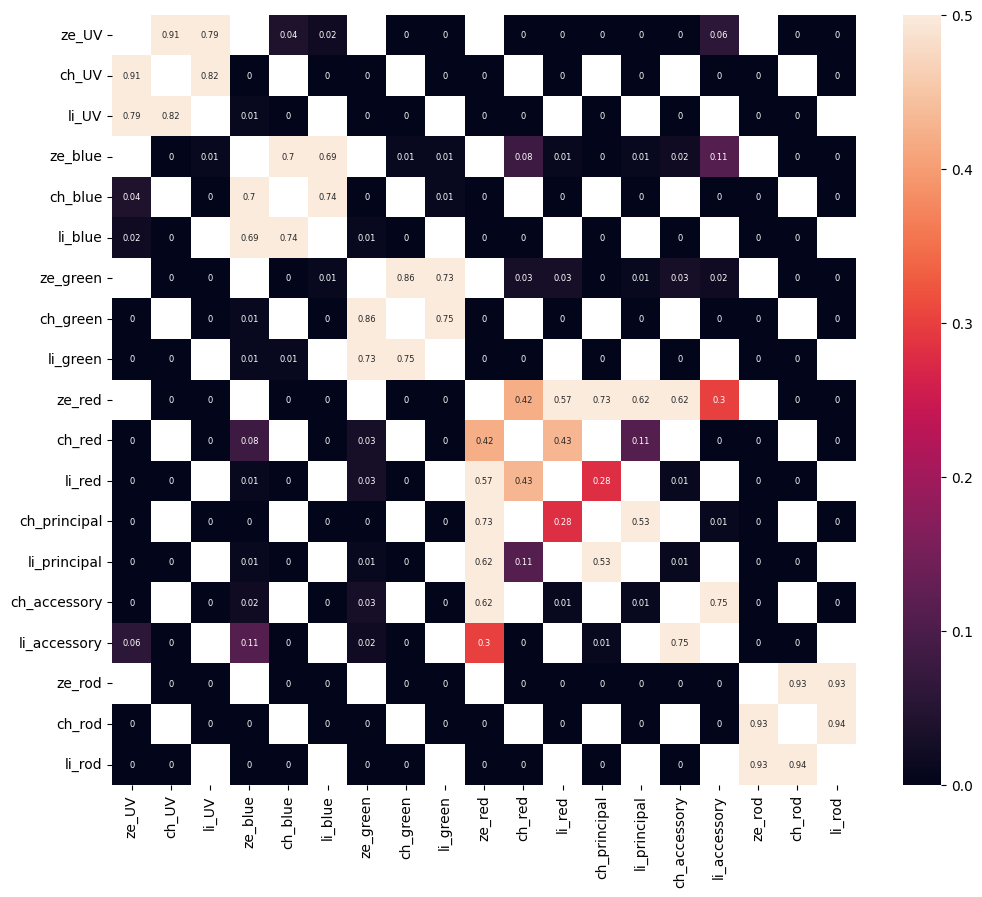

In [6]:
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/zechli/zechli_double')

In [7]:
# Check genes
gene_pairs = controlres[0][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;UV to ze;UV
Calculating gene pairs for the mapping: ch;accessory to li;accessory
Calculating gene pairs for the mapping: ch;accessory to ze;red
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;blue to ze;blue
Calculating gene pairs for the mapping: ch;green to li;green
Calculating gene pairs for the mapping: ch;green to ze;green
Calculating gene pairs for the mapping: ch;principal to li;principal
Calculating gene pairs for the mapping: ch;principal to li;red
Calculating gene pairs for the mapping: ch;principal to ze;red
Calculating gene pairs for the mapping: ch;red to li;red
Calculating gene pairs for the mapping: ch;red to ze;blue
Calculating gene pairs for the mapping: ch;red to ze;red
Calculating gene pairs for the mapping: ch;rod to li;rod
Calculating gene pairs for the mapping: ch;rod to ze;rod
Calculating gene pairs for the mappin

ch_UV;li_UV ch_UV;li_UV_pval1 ch_UV;li_UV_pval2  \
0           ch_NRXN3;li_NRXN3               0.0               0.0   
1         ch_OPN1SW;li_OPN1SW               0.0               0.0   
2       ch_PCDH11X;li_PCDH11X               0.0               0.0   
3             ch_TBX2;li_TBX2               0.0               0.0   
4            ch_FABP5;li_RBP1               0.0          0.000016   
5            ch_CDH12;li_CDH7               0.0          0.000365   
6             ch_FAT1;li_FAT1          0.000772               0.0   
7           ch_PTPRS;li_PTPRD               0.0               0.0   
8             ch_DCX;li_DCLK1               0.0          0.000001   
9             ch_NEBL;li_NEBL               0.0          0.000285   
10          ch_DCLK2;li_DCLK1               0.0          0.000001   
11            ch_NAV2;li_NAV2               0.0          0.002944   
12          ch_MAGI1;li_MAGI1          0.008177               0.0   
13        ch_FAM19A2;li_TAFA3          0.007756          0.000001   
14        ch_LHFPL4;li_LHFPL3          0.000161          0.000063   
15  ch_LOC101749175;li_LHFPL3          0.003929          0.000063   
16              ch_BSG;li_BSG          0.006194          0.004325   
17                        NaN               NaN               NaN   
18                        NaN               NaN               NaN   
19                        NaN               NaN               NaN   
20                        NaN               NaN               NaN   
21                        NaN               NaN               NaN   
22                        NaN               NaN               NaN   
23                        NaN               NaN               NaN   
24                        NaN               NaN               NaN   
25                        NaN               NaN               NaN   
26                        NaN               NaN               NaN   
27                        NaN               NaN               NaN   
28                        NaN               NaN               NaN   
29                        NaN               NaN               NaN   
30                        NaN               NaN               NaN   
31                        NaN               NaN               NaN   
32                        NaN               NaN               NaN   
33                        NaN               NaN               NaN   
34                        NaN               NaN               NaN   
35                        NaN               NaN               NaN   
36                        NaN               NaN               NaN   
37                        NaN               NaN               NaN   
38                        NaN               NaN               NaN   
39                        NaN               NaN               NaN   
40                        NaN               NaN               NaN   
41                        NaN               NaN               NaN   
42                        NaN               NaN               NaN   
43                        NaN               NaN               NaN   
44                        NaN               NaN               NaN   
45                        NaN               NaN               NaN   
46                        NaN               NaN               NaN   
47                        NaN               NaN               NaN   
48                        NaN               NaN               NaN   
49                        NaN               NaN               NaN   
50                        NaN               NaN               NaN   
51                        NaN               NaN               NaN   
52                        NaN               NaN               NaN   
53                        NaN               NaN               NaN   
54                        NaN               NaN               NaN   
55                        NaN               NaN               NaN   
56                        NaN               NaN               NaN   
57              

## Remove opsins

In [8]:
path = '../../Species_Objects/Cone_Objects/updated/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
identlist = ['ze', 'ch', 'li']
zechli_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
zechli_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
zechli_double

{'ze': '../../Species_Objects/Cone_Objects/updated/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/updated/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/updated/Lizard_double.h5ad'}

In [9]:
def wrapper(seed, downsample):
    return SAMapTrial(zechli_double, gnnm, remove_genes = opsins, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes = nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM
RUNNING SAM
RUNNING SAMIteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0RUNNING SAM
Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAMRUNNING SAM

RUNNING SAMIteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.9335612805174619
Iteration: 1, Convergence: 0.9338105846876358
Iteration: 1, Convergence: 0.9327579514499866
Iteration: 1, Convergence: 0.9323260819859532
Iteration: 1, Convergence: 0.9319945278900507
Iteration: 1, Convergence: 0.9327772264272436
Iteration: 1, Convergence: 0.932961385909256
Iteration: 1, Convergence: 0.9330614125710625
Iteration: 1, Convergence: 0.9318768743665354
Iteration: 1, Convergence: 0.9328120054367004
Iteration: 2, Convergence: 0.019615409582997973
Iteration: 2, Convergence: 0.018735956651002715
Iteration: 2, C

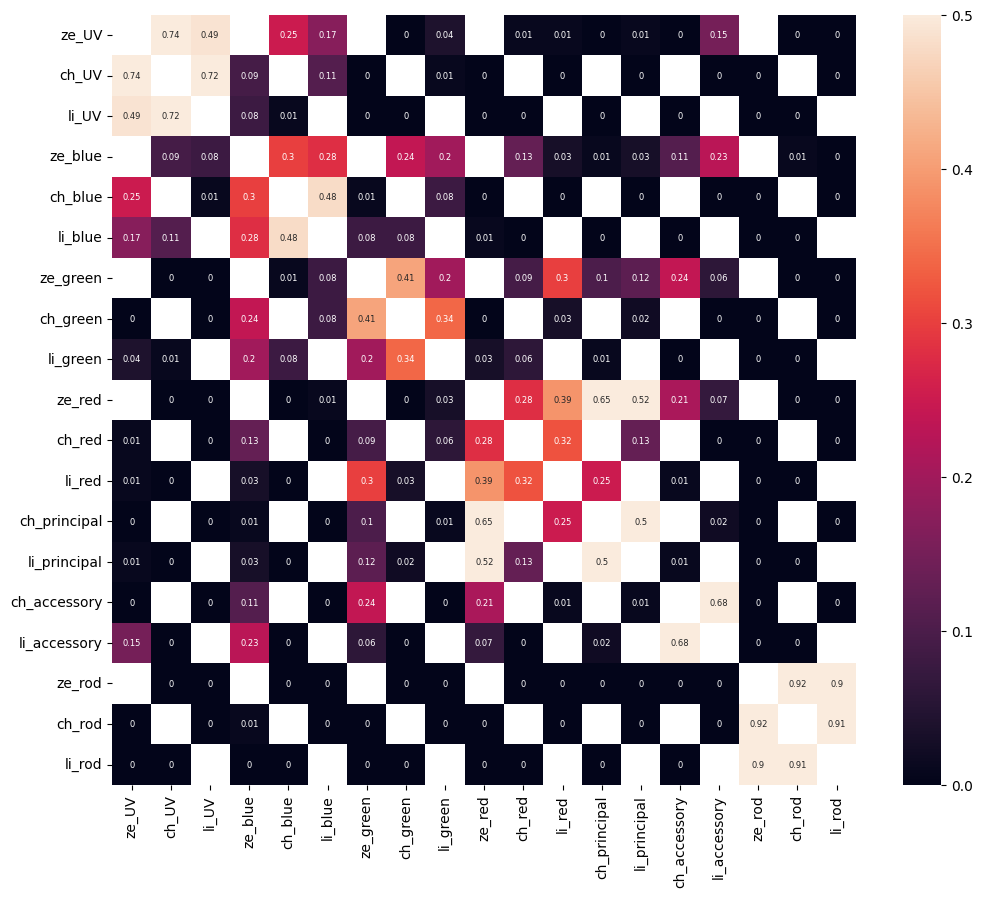

In [10]:
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/zechli/no_opsins')

In [11]:
# Check genes
gene_pairs = controlres[0][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;UV to li;blue
Calculating gene pairs for the mapping: ch;UV to ze;UV
Calculating gene pairs for the mapping: ch;accessory to li;accessory
Calculating gene pairs for the mapping: ch;accessory to ze;blue
Calculating gene pairs for the mapping: ch;accessory to ze;red
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;blue to ze;UV
Calculating gene pairs for the mapping: ch;blue to ze;blue
Calculating gene pairs for the mapping: ch;green to li;green
Calculating gene pairs for the mapping: ch;green to ze;blue
Calculating gene pairs for the mapping: ch;green to ze;green
Calculating gene pairs for the mapping: ch;principal to li;principal
Calculating gene pairs for the mapping: ch;principal to li;red
Calculating gene pairs for the mapping: ch;principal to ze;green
Calculating gene pairs for the mapping: ch;principal to ze;red
Calculating gene pai

ch_UV;li_UV ch_UV;li_UV_pval1 ch_UV;li_UV_pval2  \
0           ch_NRXN3;li_NRXN3               0.0               0.0   
1       ch_PCDH11X;li_PCDH11X               0.0               0.0   
2             ch_TBX2;li_TBX2               0.0               0.0   
3            ch_FABP5;li_RBP1               0.0          0.000016   
4            ch_CDH12;li_CDH7               0.0          0.000365   
5             ch_FAT1;li_FAT1          0.000718               0.0   
6           ch_PTPRS;li_PTPRD               0.0               0.0   
7             ch_DCX;li_DCLK1               0.0          0.000001   
8             ch_NEBL;li_NEBL               0.0          0.000288   
9           ch_DCLK2;li_DCLK1               0.0          0.000001   
10            ch_NAV2;li_NAV2               0.0          0.003009   
11          ch_MAGI1;li_MAGI1          0.008216               0.0   
12        ch_LHFPL4;li_LHFPL3          0.000182          0.000069   
13  ch_LOC101749175;li_LHFPL3          0.004218          0.000069   
14              ch_BSG;li_BSG          0.006905          0.004454   
15                        NaN               NaN               NaN   
16                        NaN               NaN               NaN   
17                        NaN               NaN               NaN   
18                        NaN               NaN               NaN   
19                        NaN               NaN               NaN   
20                        NaN               NaN               NaN   
21                        NaN               NaN               NaN   
22                        NaN               NaN               NaN   
23                        NaN               NaN               NaN   
24                        NaN               NaN               NaN   
25                        NaN               NaN               NaN   
26                        NaN               NaN               NaN   
27                        NaN               NaN               NaN   
28                        NaN               NaN               NaN   
29                        NaN               NaN               NaN   
30                        NaN               NaN               NaN   
31                        NaN               NaN               NaN   
32                        NaN               NaN               NaN   
33                        NaN               NaN               NaN   
34                        NaN               NaN               NaN   
35                        NaN               NaN               NaN   
36                        NaN               NaN               NaN   
37                        NaN               NaN               NaN   
38                        NaN               NaN               NaN   
39                        NaN               NaN               NaN   
40                        NaN               NaN               NaN   
41                        NaN               NaN               NaN   
42                        NaN               NaN               NaN   
43                        NaN               NaN               NaN   
44                        NaN               NaN               NaN   
45                        NaN               NaN               NaN   
46                        NaN               NaN               NaN   
47                        NaN               NaN               NaN   
48                        NaN               NaN               NaN   
49                        NaN               NaN               NaN   
50                        NaN               NaN               NaN   
51                        NaN               NaN               NaN   
52                        NaN               NaN               NaN   
53                        NaN               NaN               NaN   
54                        NaN               NaN               NaN   
55                        NaN               NaN               NaN   
56                        NaN               NaN               NaN   
57              

## AnimalTFDB only with DCs

In [12]:
path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
identlist = ['ze', 'ch', 'li']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
expfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Lizard_double.h5ad'}

In [13]:
def wrapper(seed, downsample):
    return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0RUNNING SAM

Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8840292147406612
Iteration: 1, Convergence: 0.8821376135341101
Iteration: 1, Convergence: 0.8812878952674784
Iteration: 1, Convergence: 0.8836140963979687
Iteration: 1, Convergence: 0.8819928370806418
Iteration: 2, Convergence: 0.024096074880165245
Iteration: 2, Convergence: 0.0250665439430567
Iteration: 2, Convergence: 0.025203518462911873
Iteration: 2, Convergence: 0.025206097388929406
Iteration: 2, Convergence: 0.024855409333219867
Elapsed time: 3.145395040512085 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.2266147136688232 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.5734713077545166 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.777364730834961 seconds
RUNNING SAM
Iteration: 0, 

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8822450329938447
Iteration: 2, Convergence: 0.026110886918596712
Elapsed time: 1.3237671852111816 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.9142247239748637 minutes.
Iteration: 1, Convergence: 0.7412786074338351
Finding cluster-specific markers in ze:annotated.
Elapsed time: 0.9482667207717895 minutes.
Finding cluster-specific markers in ze:annotated.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8831155904539928
Iteration: 2, Convergence: 0.06719798605656575
Iteration: 2, Convergence: 0.02507316400966885
Iteration: 1, Convergence: 0.8833122929306702
Elapsed time: 0.9084195017814636 minutes.
Iteration: 2, Convergence: 0.025843138433988038
Finding cluster-specific markers in ze:annotated.
Elapsed time: 3.8673160076141357 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Elapsed time: 4.893154621124268 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.9369517683982849 minutes.
Finding cluster-specific markers in ze:annotated.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 1, Convergence: 0.8822802336597203


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.026392277368331094
Iteration: 3, Convergence: 0.02114738498222224
Iteration: 1, Convergence: 0.8815494469630308
Elapsed time: 9.56835675239563 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7465793639696835
Iteration: 2, Convergence: 0.02487178074713973
Iteration: 1, Convergence: 0.7393092605093173
Elapsed time: 15.914291620254517 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7367234580929324
Elapsed time: 40.911763191223145 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.06756458498349881
Iteration: 2, Convergence: 0.0713496690859184
Iteration: 1, Convergence: 0.739066163474439
Iteration: 2, Convergence: 0.06549248970130145
Iteration: 3, Convergence: 0.020256987477612693
Iteration: 1, Convergence: 0.7263836098828589
Iteration: 2, Convergence: 0.06610644681841789
Iteration: 3, Convergence: 0.02306762717643394
Iteratio

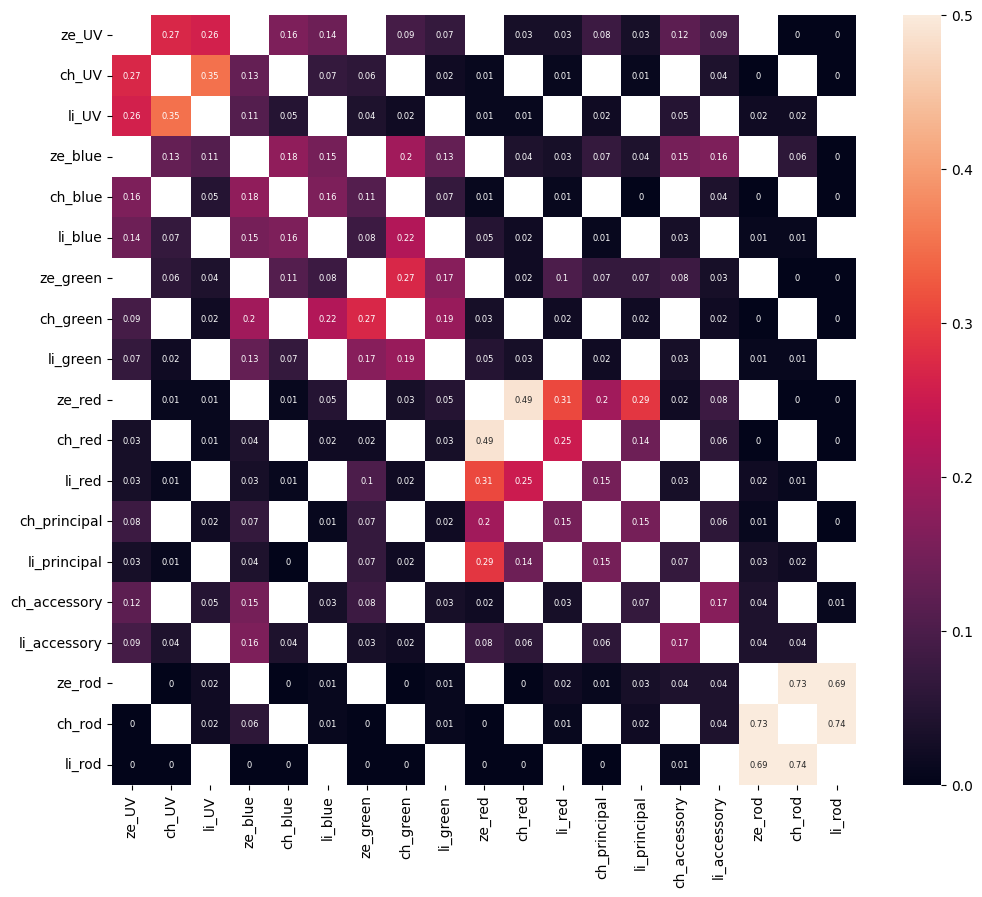

In [14]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/zechli/tf_animaldb')

In [15]:
# Check genes
gene_pairs = controlres[0][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;UV to ze;UV
Calculating gene pairs for the mapping: ch;accessory to li;accessory
Calculating gene pairs for the mapping: ch;accessory to ze;UV
Calculating gene pairs for the mapping: ch;accessory to ze;blue
Calculating gene pairs for the mapping: ch;accessory to ze;green
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;blue to ze;UV
Calculating gene pairs for the mapping: ch;blue to ze;blue
Calculating gene pairs for the mapping: ch;green to li;blue
Calculating gene pairs for the mapping: ch;green to li;green
Calculating gene pairs for the mapping: ch;green to ze;blue
Calculating gene pairs for the mapping: ch;green to ze;green
Calculating gene pairs for the mapping: ch;principal to li;principal
Calculating gene pairs for the mapping: ch;principal to li;red
Calculating gene pairs for the mapping: ch;principal to ze;red
Calculating gene p

ch_UV;li_UV ch_UV;li_UV_pval1 ch_UV;li_UV_pval2         ch_UV;ze_UV  \
0   ch_TBX2;li_TBX2               0.0               0.0    ch_TBX2;ze_tbx2a   
1               NaN               NaN               NaN  ch_SKOR1;ze_skor1a   
2               NaN               NaN               NaN  ch_SALL3;ze_sall1a   
3               NaN               NaN               NaN     ch_NFIB;ze_nfic   
4               NaN               NaN               NaN     ch_NFIB;ze_nfia   
5               NaN               NaN               NaN                 NaN   
6               NaN               NaN               NaN                 NaN   
7               NaN               NaN               NaN                 NaN   
8               NaN               NaN               NaN                 NaN   
9               NaN               NaN               NaN                 NaN   
10              NaN               NaN               NaN                 NaN   
11              NaN               NaN               NaN                 NaN   

   ch_UV;ze_UV_pval1 ch_UV;ze_UV_pval2 ch_accessory;li_accessory  \
0                0.0          0.000123         ch_MEF2C;li_MEF2C   
1                0.0          0.000856         ch_MEF2D;li_MEF2C   
2           0.000516               0.0         ch_MEF2A;li_MEF2C   
3            0.00146          0.000097                       NaN   
4            0.00146               0.0                       NaN   
5                NaN               NaN                       NaN   
6                NaN               NaN                       NaN   
7                NaN               NaN                       NaN   
8                NaN               NaN                       NaN   
9                NaN               NaN                       NaN   
10               NaN               NaN                       NaN   
11               NaN               NaN                       NaN   

   ch_accessory;li_accessory_pval1 ch_accessory;li_accessory_pval2  \
0                         0.000949                             0.0   
1                         0.004958                             0.0   
2                         0.005122                             0.0   
3                              NaN                             NaN   
4                              NaN                             NaN   
5                              NaN                             NaN   
6                              NaN                             NaN   
7                              NaN                             NaN   
8                              NaN                             NaN   
9                              NaN                             NaN   
10                             NaN                             NaN   
11                             NaN                             NaN   

    ch_accessory;ze_UV ch_accessory;ze_UV_pval1 ch_accessory;ze_UV_pval2  \
0       ch_RAX2;ze_rx1                 0.000247                      0.0   
1   ch_HIF1A;ze_hif1ab                 0.001085                      0.0   
2   ch_SKOR1;ze_skor1a                 0.000114                 0.000856   
3                  NaN                      NaN                      NaN   
4                  NaN                      NaN                      NaN   
5                  NaN                      NaN                      NaN   
6                  NaN                      NaN                      NaN   
7                  NaN                      NaN                      NaN   
8                  NaN                      NaN                      NaN   
9                  NaN                      NaN                      NaN   
10                 NaN                      NaN                      NaN   
11                 NaN                      NaN                      NaN   

        ch_accessory;ze_blue ch_accessory;ze_blue_pval1  \
0         ch_TAL2;ze_neurod1                   0.007612   
1   ch_HLF;ze_CABZ01087224.1                   0.000074   
2             ch_R

## TF Liu with DCs

In [16]:
path = '../../Species_Objects/Cone_Objects/only_tfs_corbo/'
specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
identlist = ['ze', 'ch', 'li']
controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
expfiles

{'ze': '../../Species_Objects/Cone_Objects/only_tfs_corbo/ZebrafishAdult_double.h5ad',
 'ch': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Chicken_double.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_corbo/Lizard_double.h5ad'}

In [17]:
def wrapper(seed, downsample):
    return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7212858665376588Iteration: 1, Convergence: 0.711466997354141Iteration: 1, Convergence: 0.713557399013485


Iteration: 1, Convergence: 0.7027328139165819
Iteration: 1, Convergence: 0.6974134840543295
Iteration: 2, Convergence: 0.03783760259832234
Iteration: 2, Convergence: 0.0373499113985111
Iteration: 2, Convergence: 0.0407901493531879Iteration: 2, Convergence: 0.04383689937651982

Iteration: 2, Convergence: 0.042792662938892785
Iteration: 3, Convergence: 0.020250691443609175
Iteration: 3, Convergence: 0.016999650803115215
Iteration: 3, Convergence: 0.019503634355317264
Iteration: 3, Convergence: 0.01825563438889326
Iteration: 3, Convergence: 0.018379692342038987
Elapsed time: 2.4879491329193115 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM



Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0



Elapsed time: 0.8345024506251018 minutes.
Finding cluster-specific markers in ze:annotated.
Iteration: 1, Convergence: 0.7091738037501499
Iteration: 1, Convergence: 0.6987311530004872Iteration: 1, Convergence: 0.7147871279196283

Iteration: 1, Convergence: 0.7036674941473001
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 2, Convergence: 0.04631244777550467Iteration: 2, Convergence: 0.04798107114838477

Iteration: 2, Convergence: 0.03802385328531508Iteration: 2, Convergence: 0.03516210024791619

Iteration: 3, Convergence: 0.015776262584187524Iteration: 3, Convergence: 0.015124793430394782

Iteration: 3, Convergence: 0.017387352476721088Iteration: 3, Convergence: 0.015631766569726004



/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 2.1373472213745117 seconds
Elapsed time: 2.141665458679199 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 2.1817452907562256 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0Elapsed time: 2.204918622970581 seconds

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.6982399621075119
Iteration: 1, Convergence: 0.4665816099328194
Iteration: 1, Convergence: 0.47041492036507904
Iteration: 1, Convergence: 0.47759517564505194
Iteration: 1, Convergence: 0.4657404745795067
Iteration: 2, Convergence: 0.07088286092027149
Iteration: 2, Convergence: 0.04115801121271988
Iteration: 2, Convergence: 0.06852189820373886
Iteration: 2, Convergence: 0.07507033581482661Iteration: 2, Convergence: 0.07715255240384375

Iteration: 3, Convergence: 0.036847964283712176
Iteration: 3, Convergence: 0.015650266759861673
Iteration: 3, Convergence: 0.034278593016404714
Iteration: 3

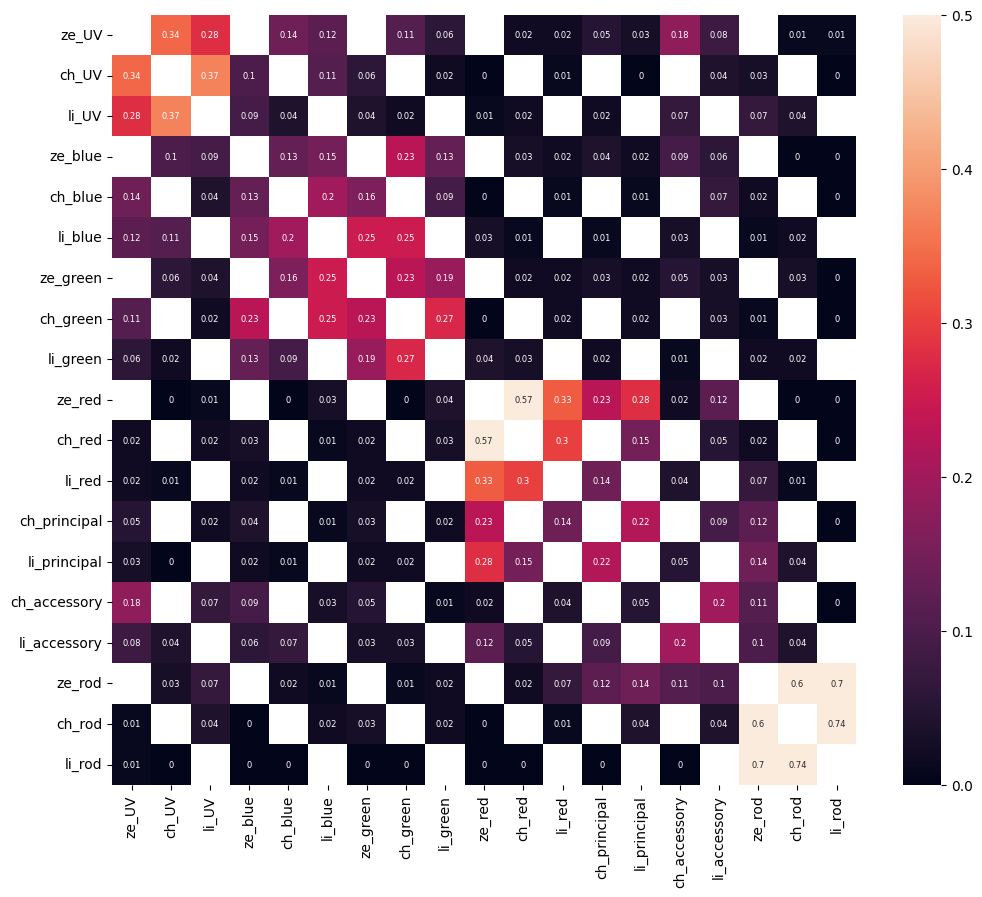

In [18]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/zechli/tf_liu')

In [74]:
# raise KeyboardInterrupt

KeyboardInterrupt: 

## TF only with DCs (no skor1)

In [19]:
# path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
# specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
# identlist = ['ze', 'ch', 'li']
# controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
# expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
# expfiles

In [20]:
# def wrapper(seed, downsample):
#     return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, remove_genes=['skor1a', 'SKOR1'], downsample = downsample)

# if __name__ == '__main__':
#     with Pool(processes=nprocess) as p:
#         controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

In [21]:
# MeanTable(controlres, vmax = 0.5)

In [22]:
# # Check genes
# gene_pairs = controlres[0][2].find_all(align_thr=0.10)
# gene_pairs

## TF only with DCs (no tbx2)

In [23]:
# path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
# specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
# identlist = ['ze', 'ch', 'li']
# controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
# expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
# expfiles

In [24]:
# def wrapper(seed, downsample):
#     return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, remove_genes=['tbx2a', 'TBX2'], downsample = downsample)

# if __name__ == '__main__':
#     with Pool(processes=nprocess) as p:
#         controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

In [25]:
# MeanTable(controlres, vmax = 0.5)

In [26]:
# # Check genes
# gene_pairs = controlres[0][2].find_all(align_thr=0.10)
# gene_pairs

In [27]:
# controlres[0][0].query_gene_pairs('ch_SKOR1')

## TF only with DCs (no mef2c)

In [28]:
# path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
# specieslist = ['ZebrafishAdult', 'Chicken', 'Lizard']
# identlist = ['ze', 'ch', 'li']
# controlfiles = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
# expfiles = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
# expfiles

In [29]:
# def wrapper(seed, downsample):
#     return SAMapTrial(expfiles, gnnm, plot = False, seed = seed, remove_genes=['mef2cb', 'MEF2C', 'hivep3b', 'HIVEP3', 'arid3b', 'ARID3B', 'RXRA', 'HLF', 'skor1a', 'SKOR1'], downsample = downsample)

# if __name__ == '__main__':
#     with Pool(processes=nprocess) as p:
#         controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

In [30]:
# MeanTable(controlres, vmax = 0.5)

In [31]:
# # Check genes
# gene_pairs = controlres[0][2].find_all(align_thr=0.10)
# gene_pairs

# Swap experiments

In [4]:
path = '../../Species_Objects/Cone_Objects/updated/'
specieslist = ['Chicken', 'Lizard']
identlist = ['ch', 'li']
chli_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
chli_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
chli_swapch = my_dict = {'ch': path + 'Chicken_single.h5ad', 'li': path + 'Lizard_double.h5ad'}
chli_swapli = my_dict = {'ch': path + 'Chicken_double.h5ad', 'li': path + 'Lizard_single.h5ad'}
chli_noDCAch = my_dict = {'ch': path + 'Chicken_noDC-A.h5ad', 'li': path + 'Lizard_double.h5ad'}
chli_noDCAli = my_dict = {'ch': path + 'Chicken_double.h5ad', 'li': path + 'Lizard_noDC-A.h5ad'}
chli_noDCAch

{'ch': '../../Species_Objects/Cone_Objects/updated/Chicken_noDC-A.h5ad',
 'li': '../../Species_Objects/Cone_Objects/updated/Lizard_double.h5ad'}

## Chicken and lizard without DCs

In [33]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_single, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM

RUNNING SAM
Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8906712328941204
Iteration: 1, Convergence: 0.8911032392995171
Iteration: 1, Convergence: 0.8910924933811594
Iteration: 1, Convergence: 0.8914633980942301
Iteration: 1, Convergence: 0.8921339083463514
Iteration: 2, Convergence: 0.02327905689218473
Iteration: 2, Convergence: 0.021296004200705893
Elapsed time: 3.3633766174316406 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.02249539114413313
Iteration: 2, Convergence: 0.02312223093676776
Elapsed time: 4.642073631286621 secondsIteration: 2, Convergence: 0.021375515613248786

Iteration: 1, Convergence: 0.8259232696220414
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.04040816526911953
Elapsed time: 6.116271018981934 seconds
Elapsed time: 6.22

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Prepping datasets for translation.
Prepping datasets for translation.
Running UMAP on the stitched manifolds.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Translating feature spaces pairwise.
Translating feature spaces pairwise.
RUNNING SAM
Iteration: 0, Convergence: 1.0
Projecting data into joint latent space. 0.3107314109802246
Projecting data into joint latent space. 0.36301755905151367
Correcting data with means. 0.28762316703796387
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Rescaling edge weights by expression correlations.
Correcting data with means. 0.32822537422180176
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Concatenating SAM objects...
Iteration: 1, Convergence: 0.8915776582159415
Iteration 3 complete.
Alignment scores:
          ch      li
ch  0.000000  0.6536
li  0.711097  0.0000
Running UMAP on the stitched manifolds.
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
         ch        li
ch  0.00000  0.657569
li  0.71554  0.000000
Run

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 0.7014870842297872 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.RUNNING SAM
Iteration: 0, Convergence: 1.0



/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.89015077344881
Iteration: 1, Convergence: 0.8929697470197551
Iteration: 1, Convergence: 0.8904342019571608
Iteration: 2, Convergence: 0.023125234641937515
Iteration: 1, Convergence: 0.89216462789739
Iteration: 2, Convergence: 0.02119264323617282
Elapsed time: 33.76477289199829 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 33.639792919158936 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.0223570265974441
Iteration: 1, Convergence: 0.8276749306553584
Not updating the manifold...
Iteration: 2, Convergence: 0.034970897738707624
Iteration: 1, Convergence: 0.8293511513199934
Elapsed time: 28.918134927749634 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.021864224210845145
Iteration: 3, Convergence: 0.011940899130770446
Iteration: 2, Convergence: 0.034643256146228894
Elapsed time: 18.336570262908936 seconds
Iteration: 1, Convergence: 0.82

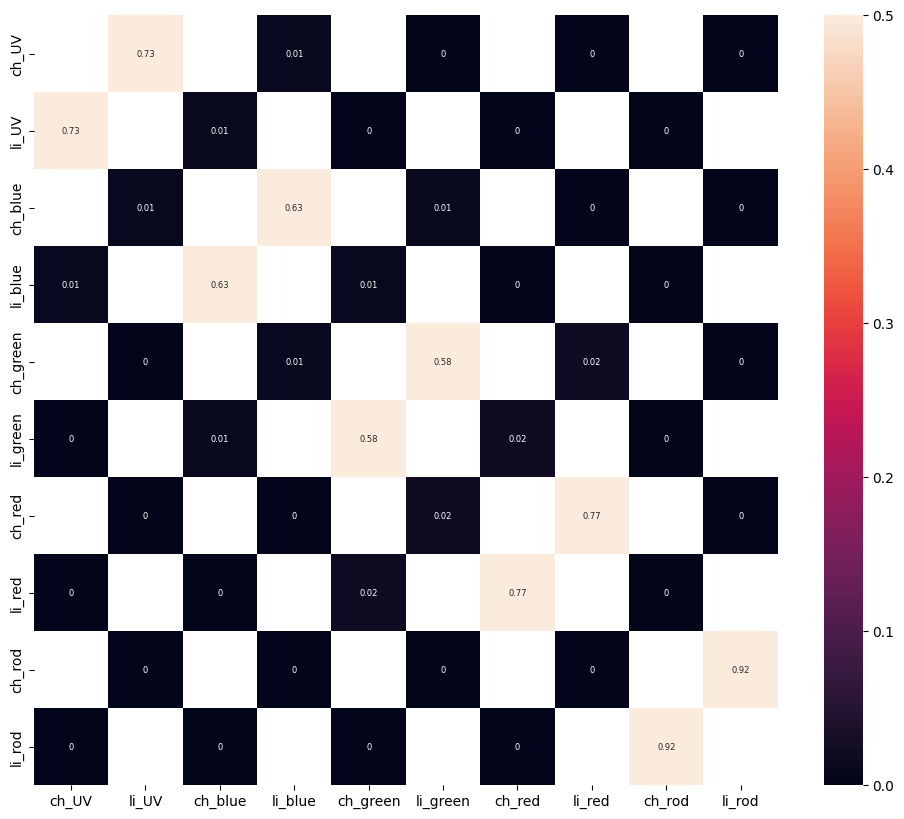

In [34]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap/chli_single')

## Chicken and lizard with DCs

In [ ]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_double, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM
RUNNING SAM








Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0






Iteration: 1, Convergence: 0.8902085863728321
Iteration: 1, Convergence: 0.8900990480076564Iteration: 1, Convergence: 0.8915327399116345

Iteration: 1, Convergence: 0.8898347673342863
Iteration: 1, Convergence: 0.890178951282264
Iteration: 1, Convergence: 0.8899489401835636Iteration: 1, Convergence: 0.889892092989811

Iteration: 1, Convergence: 0.8912784071819403
Iteration: 1, Convergence: 0.8902468746357248
Iteration: 1, Convergence: 0.8906165128220065
Iteration: 2, Convergence: 0.016261147274108736
Iteration: 2, Convergence: 0.016854291253458543
Iteration: 2, Co

In [ ]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap/chli_double')

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

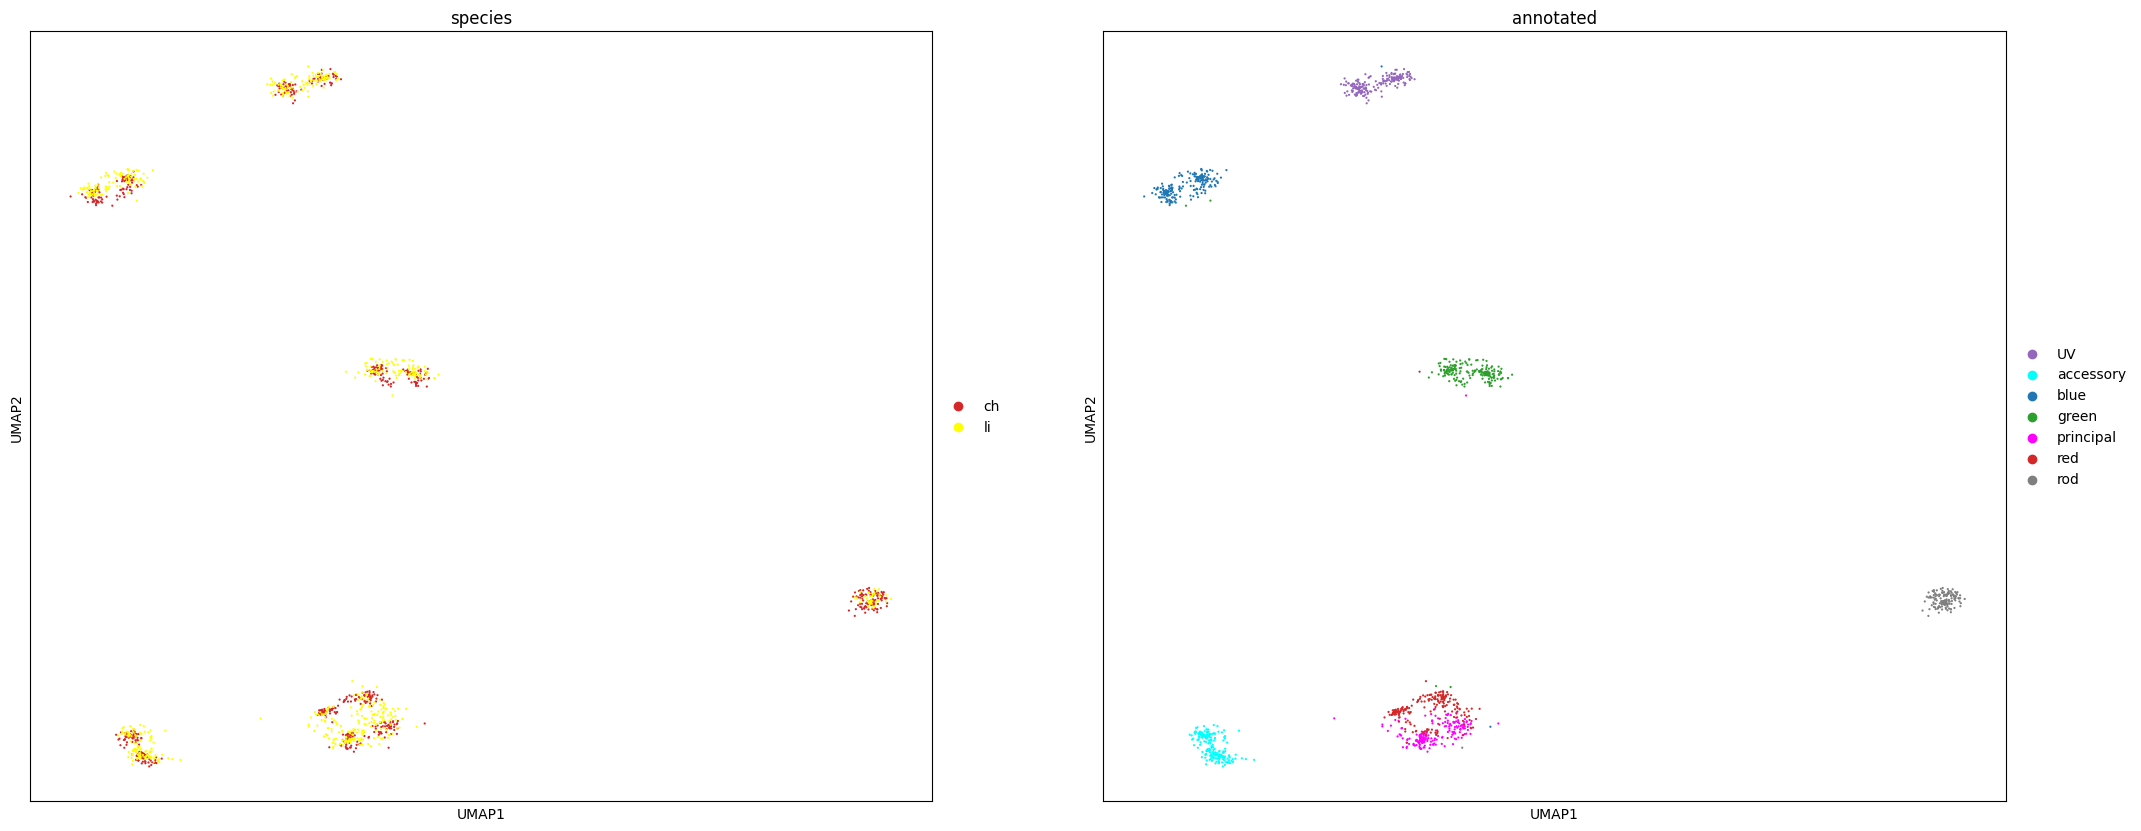

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

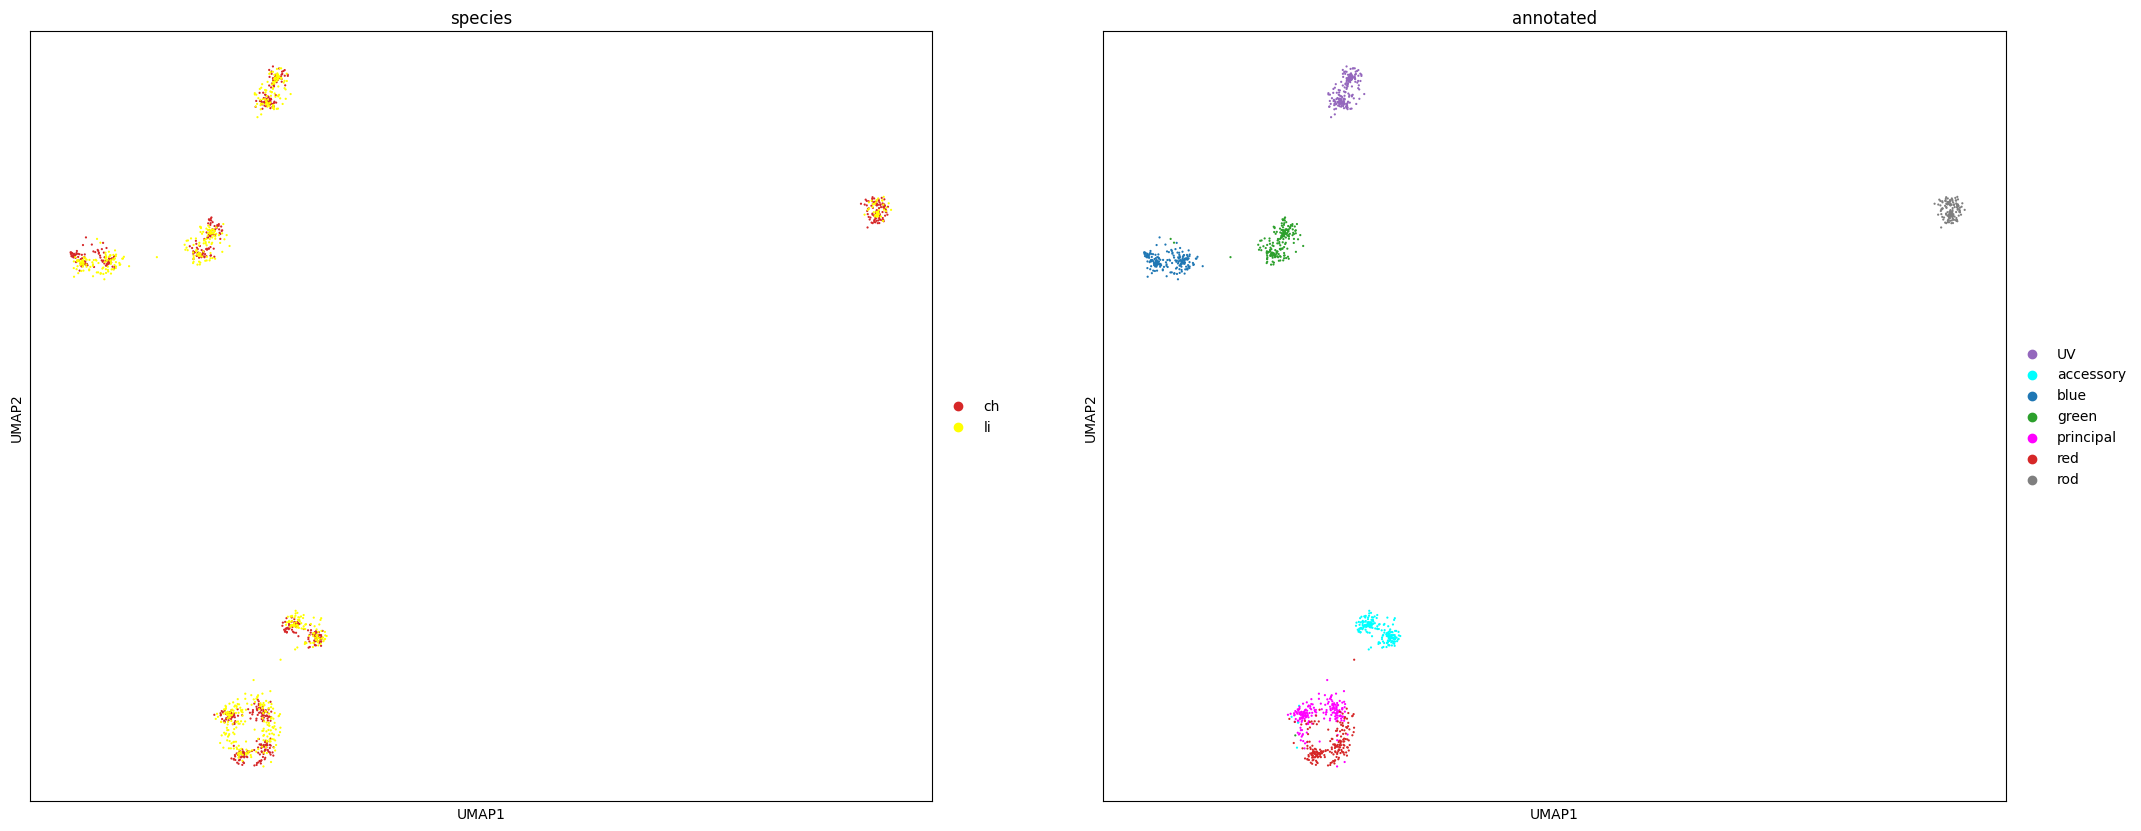

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

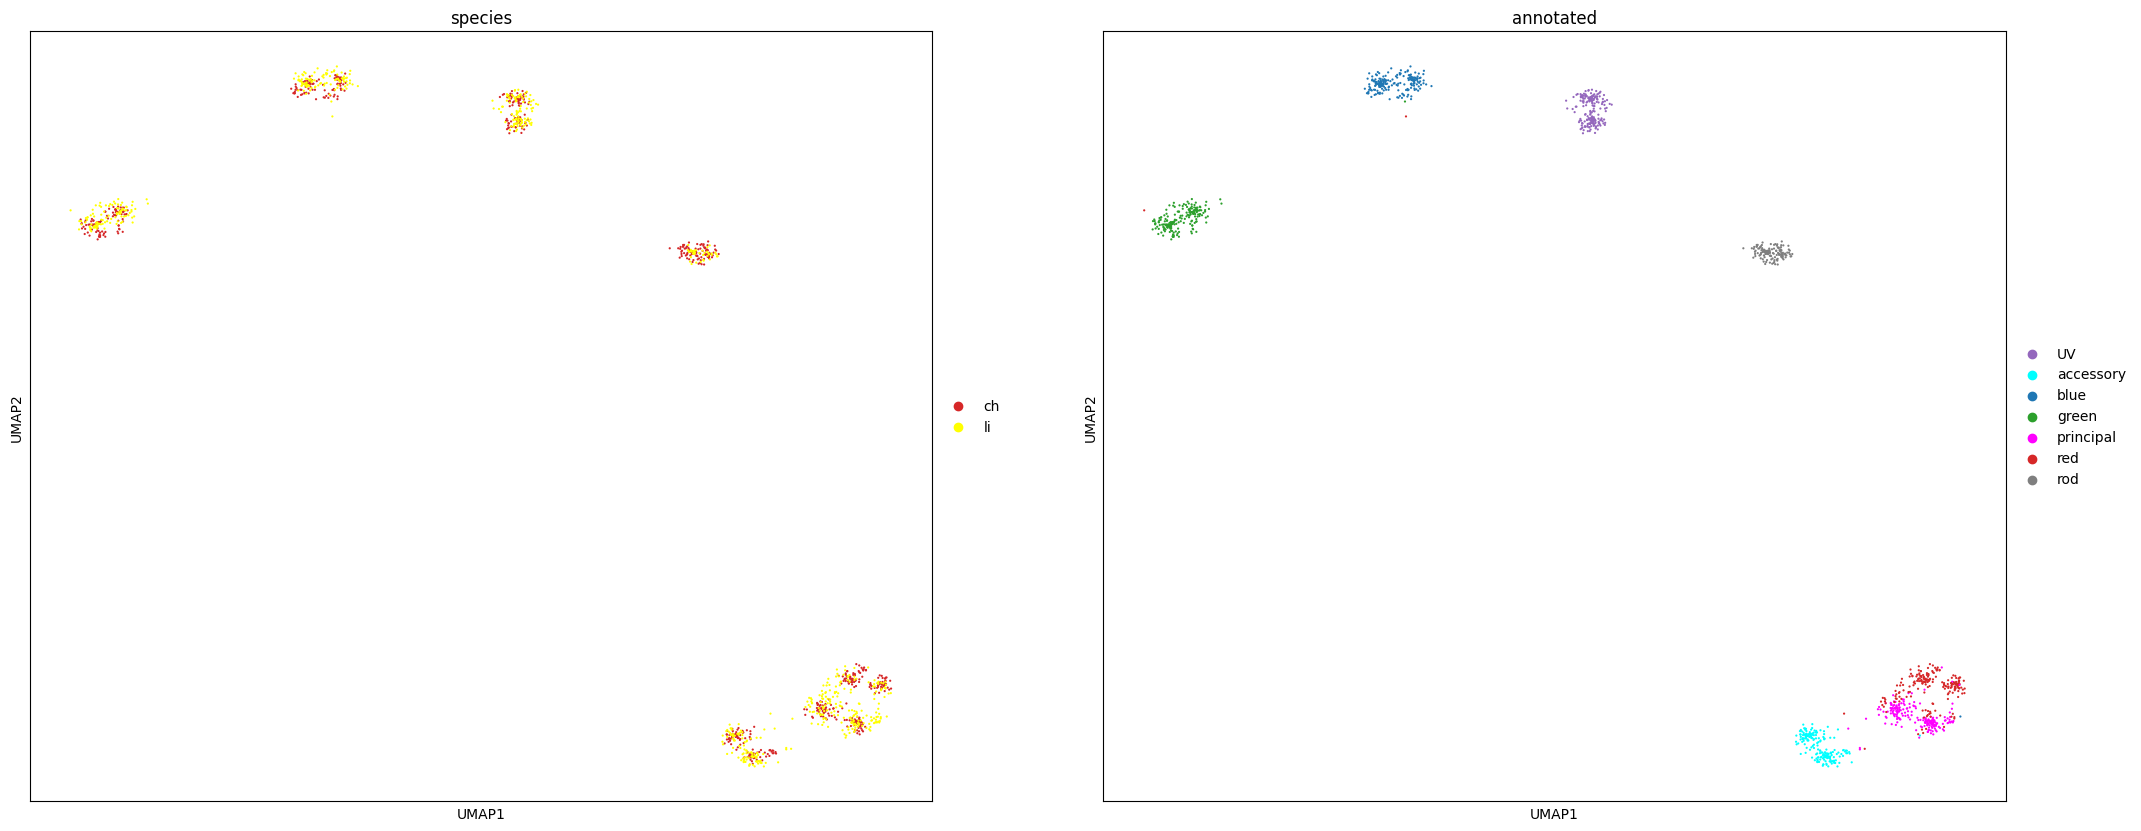

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

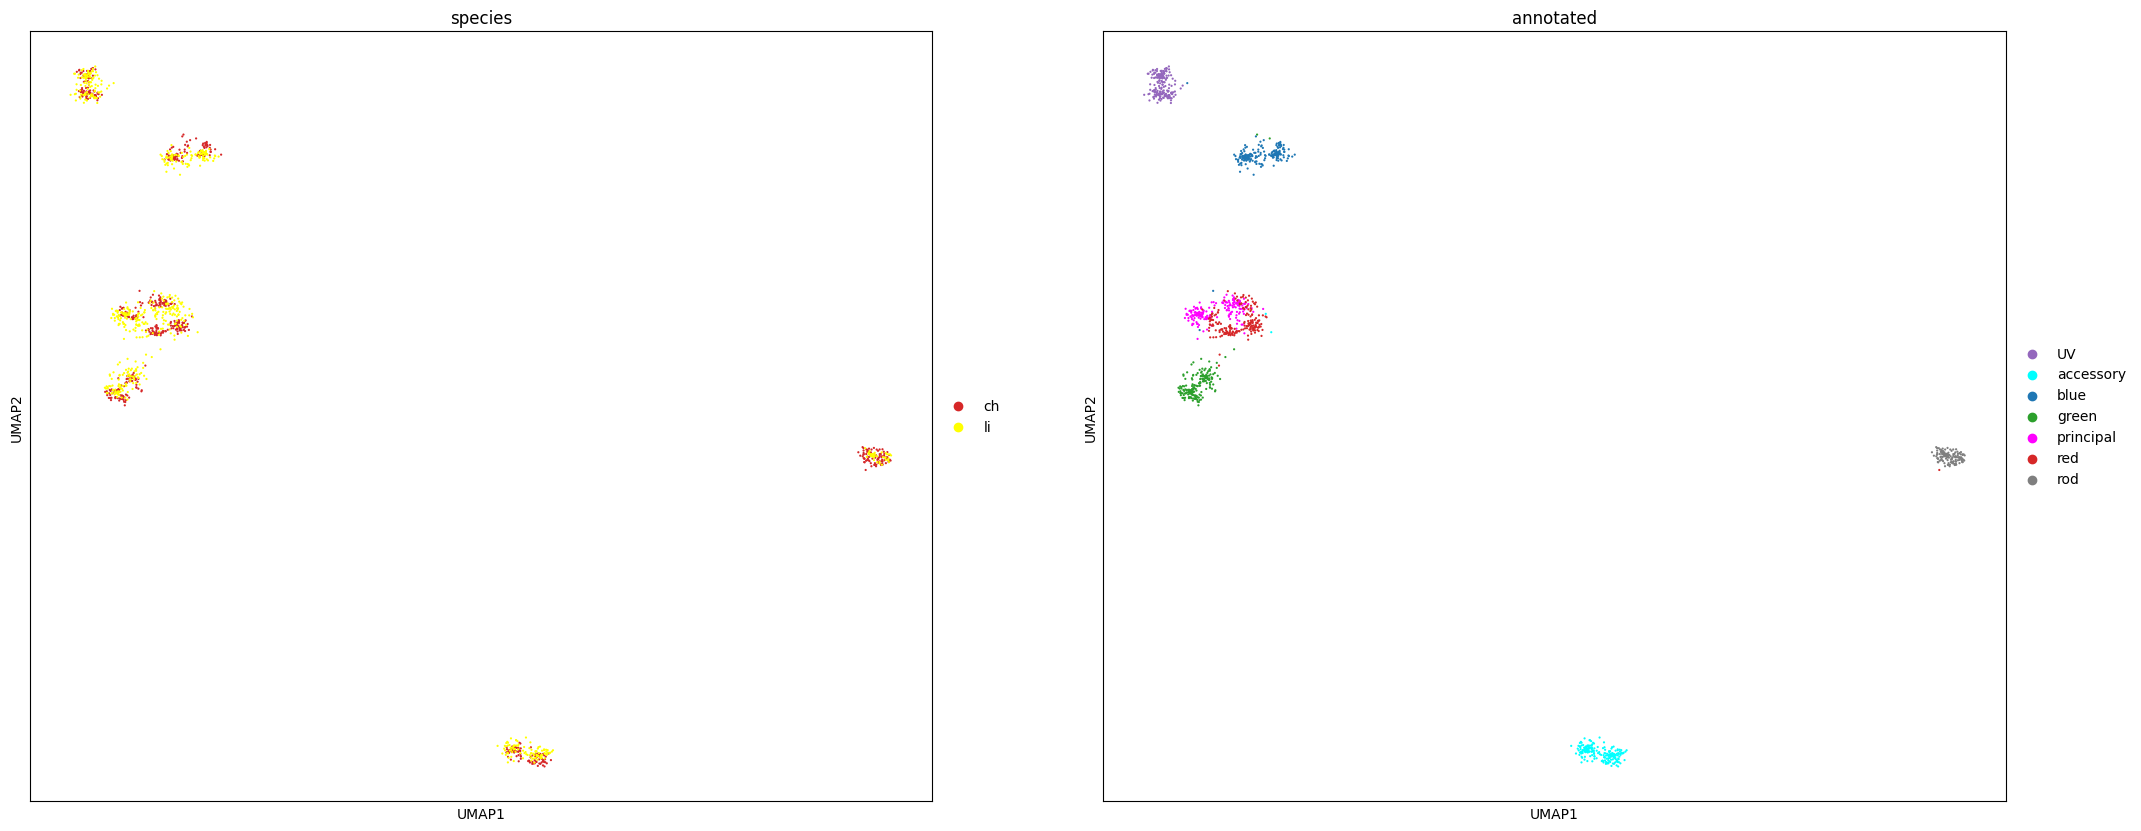

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

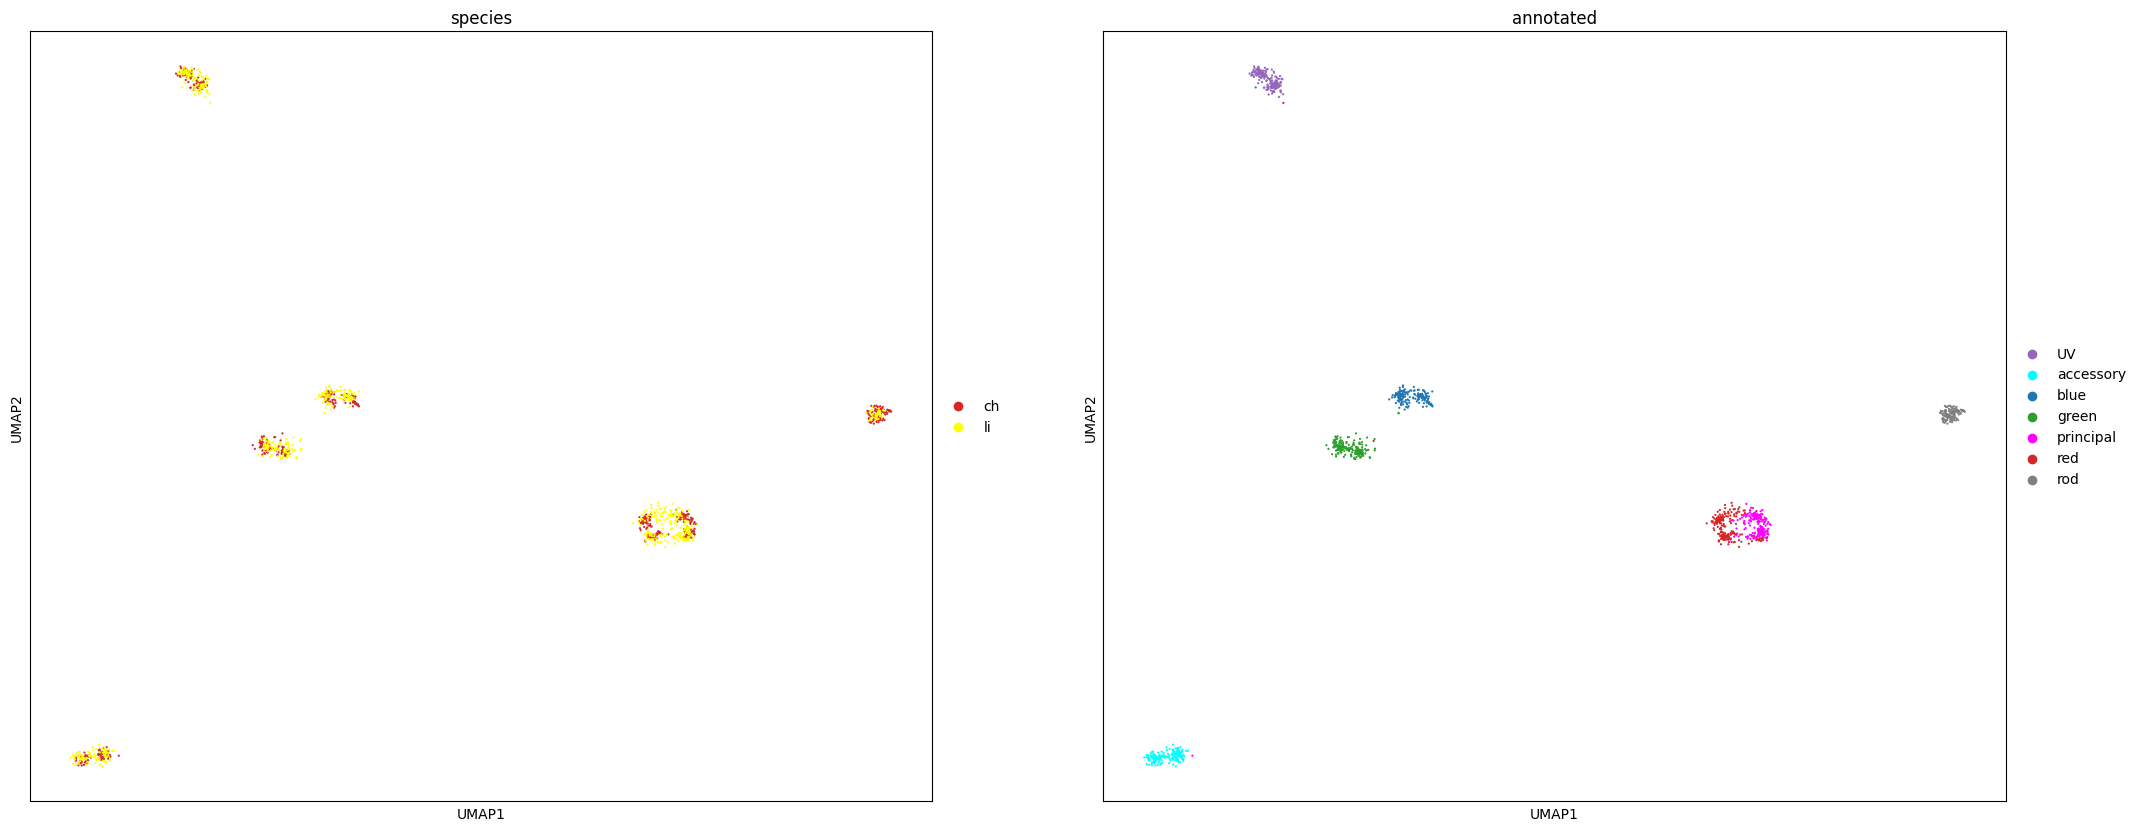

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

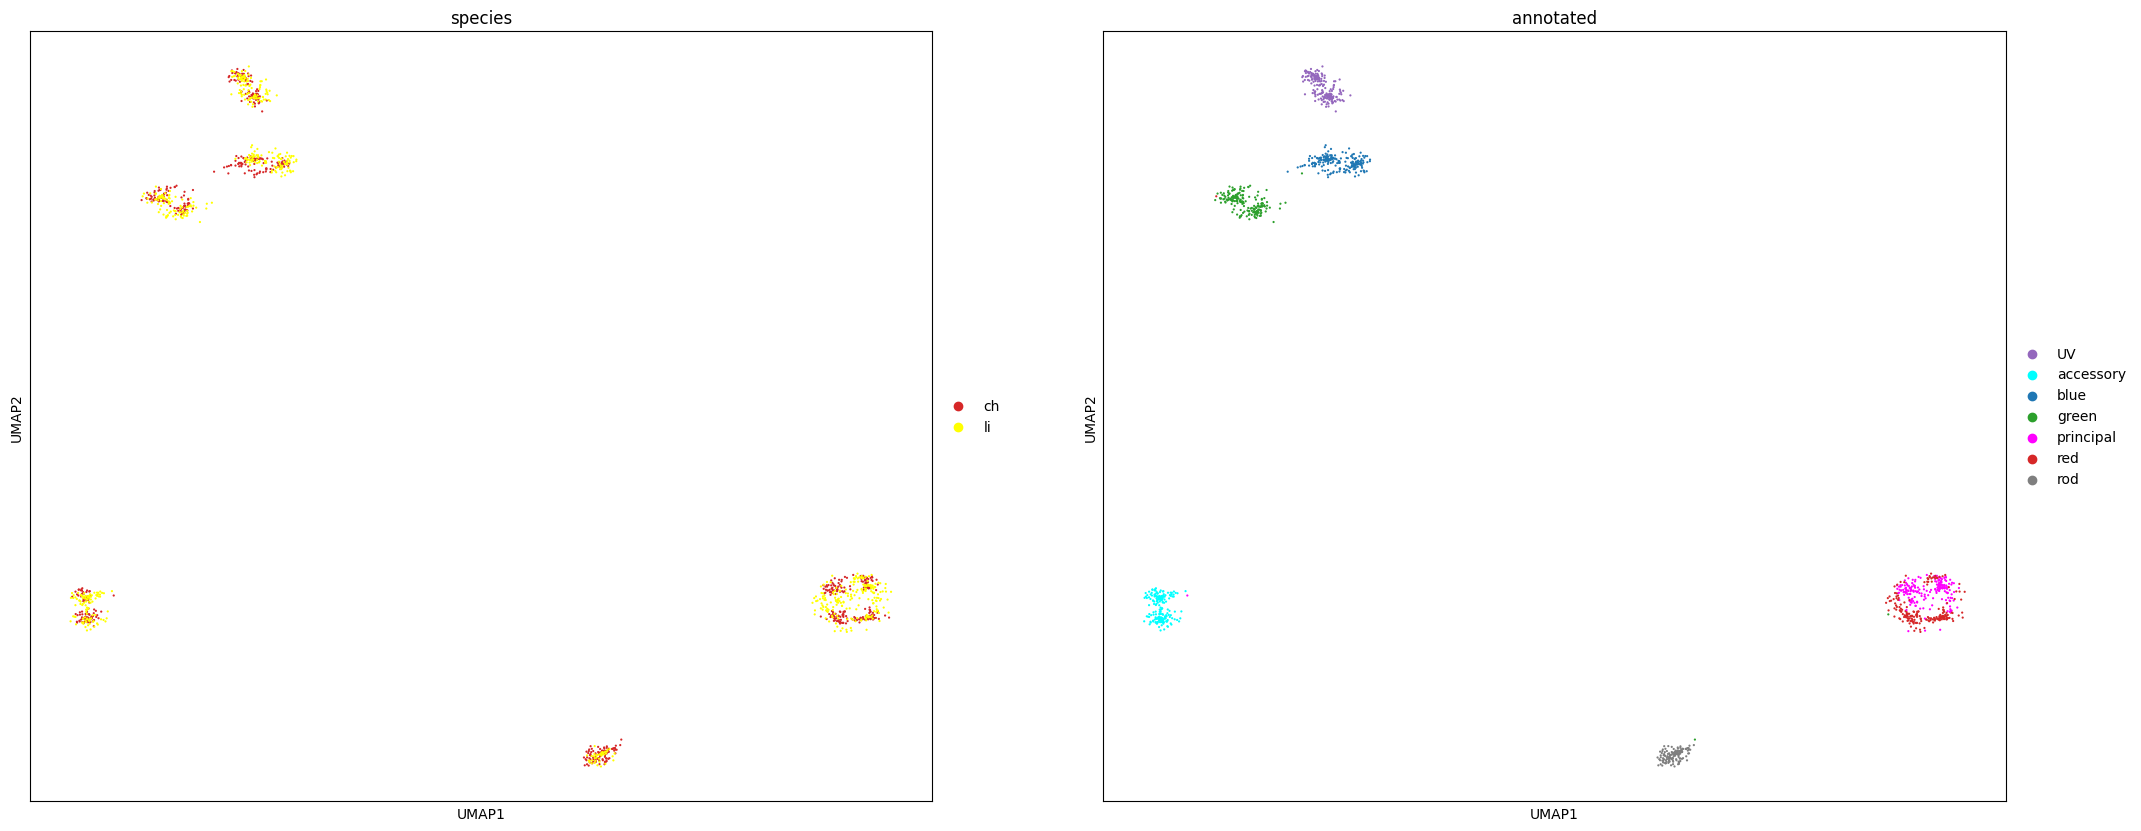

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

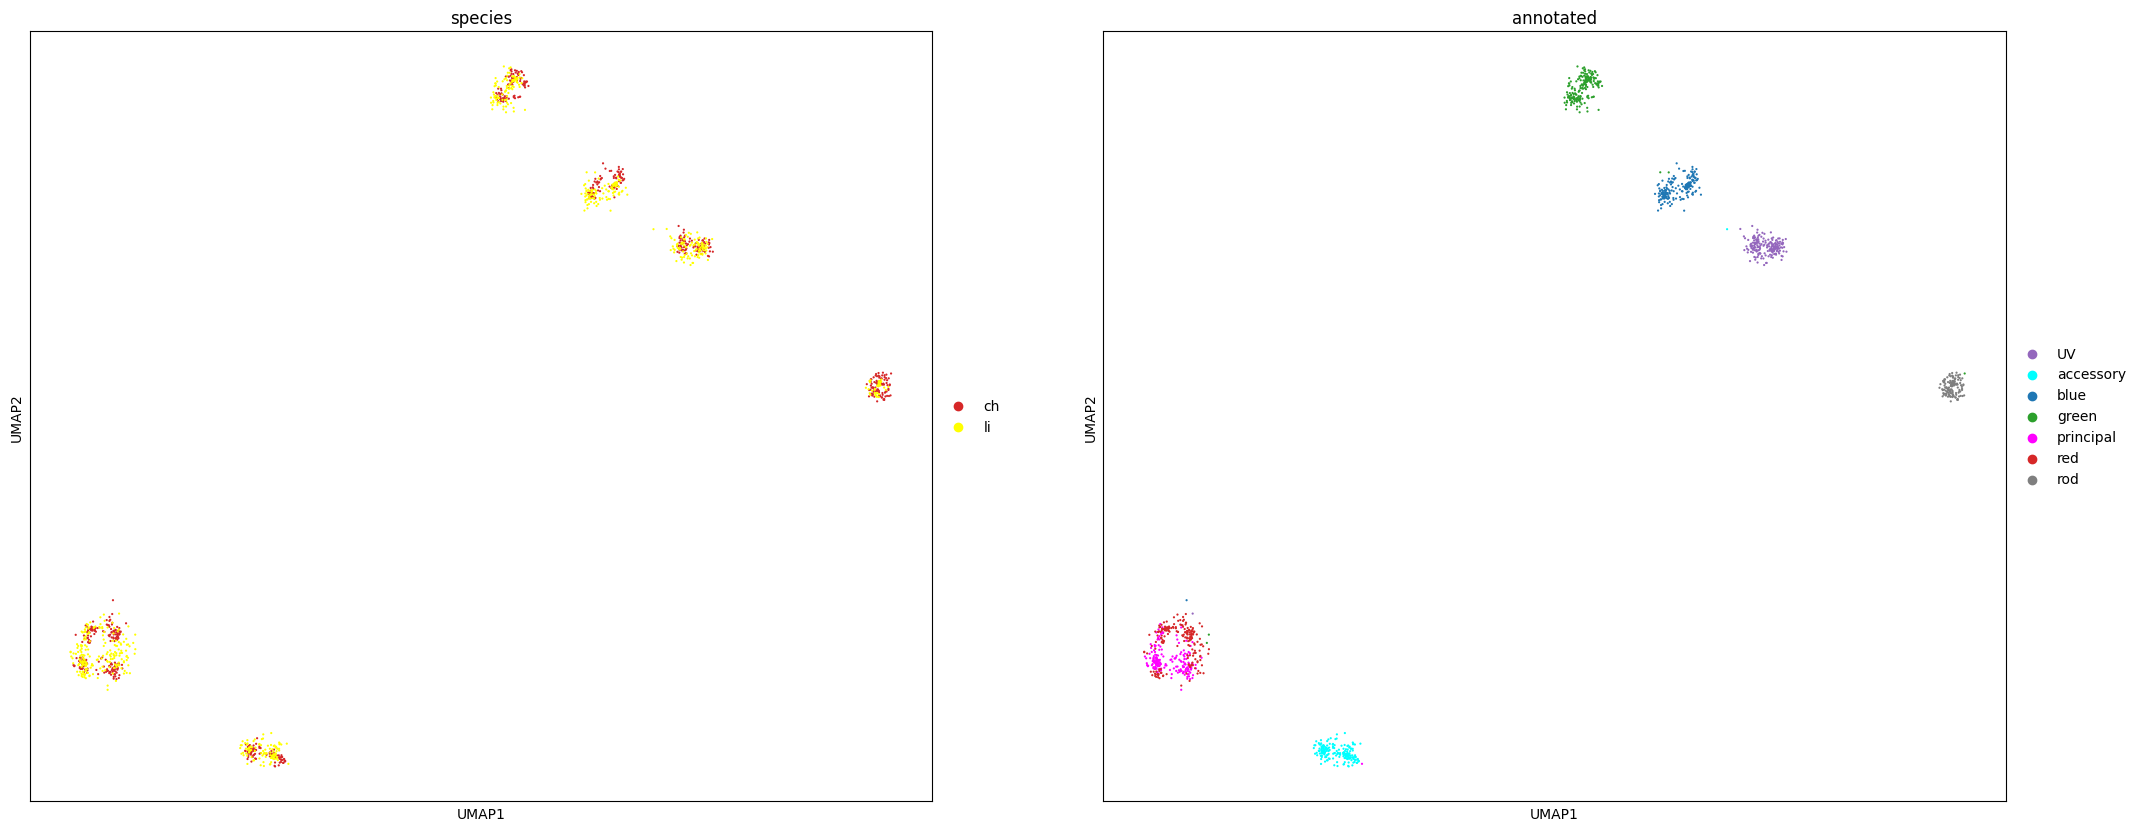

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

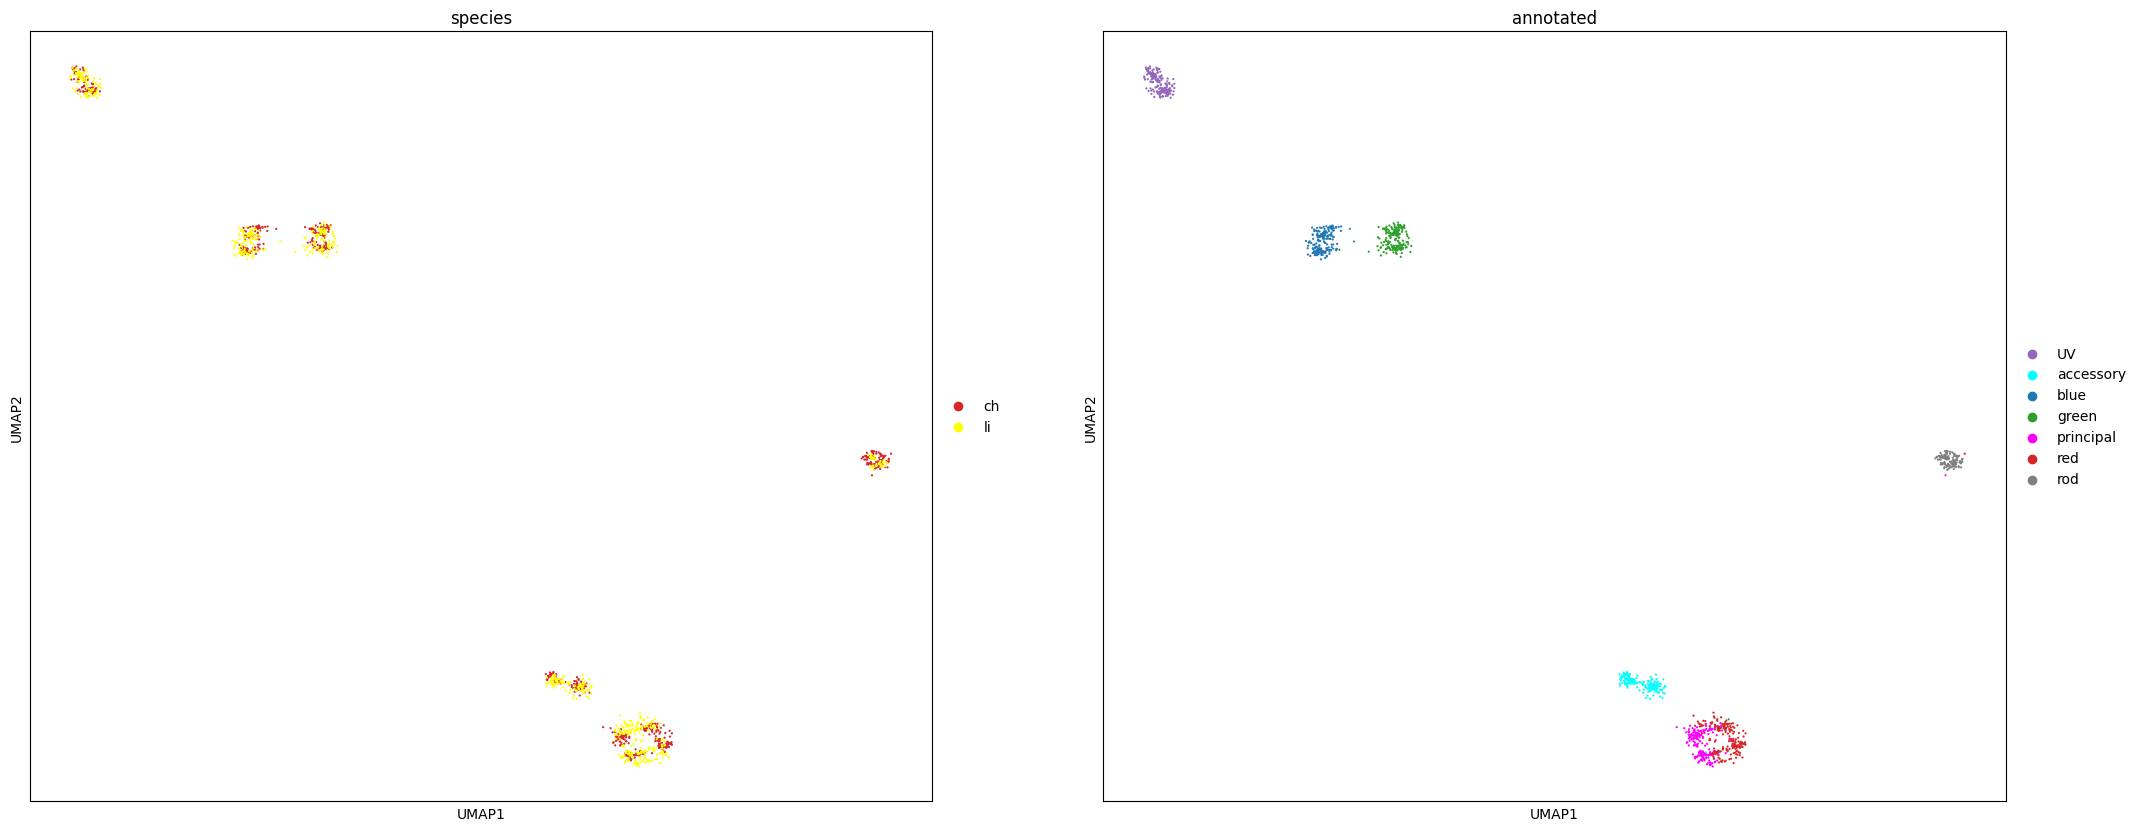

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

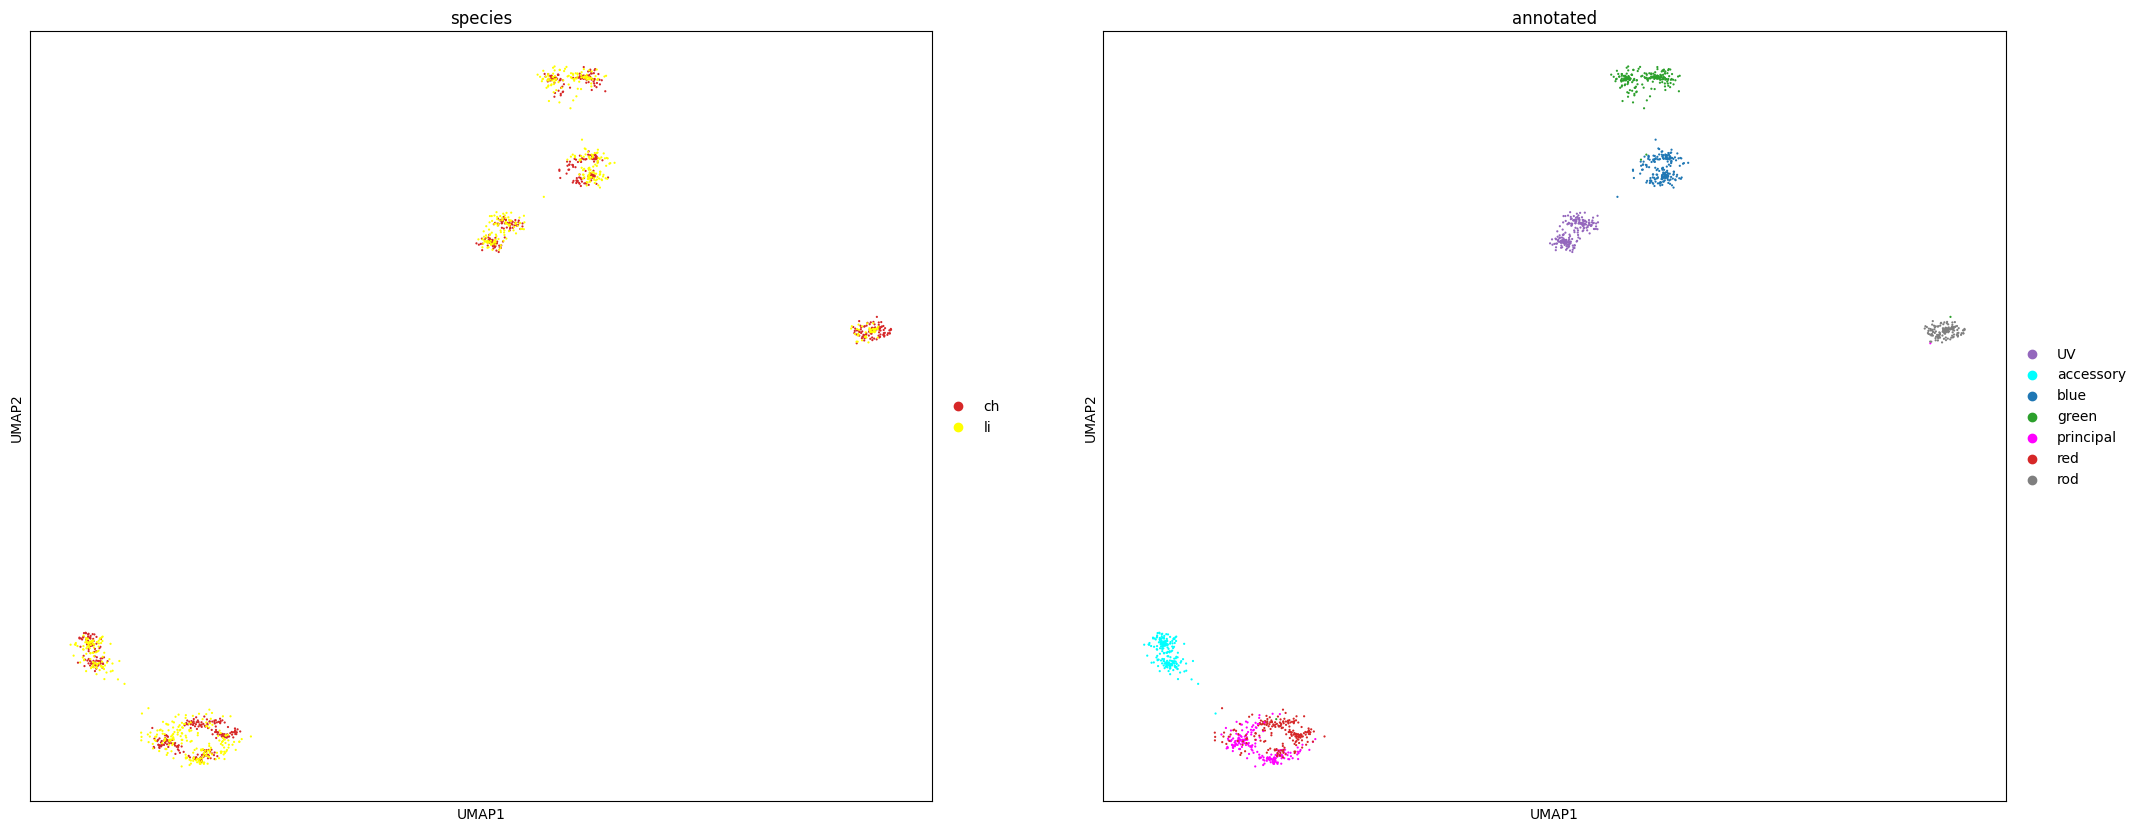

/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/global/home/users/dtommasini/.conda/envs/samap2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

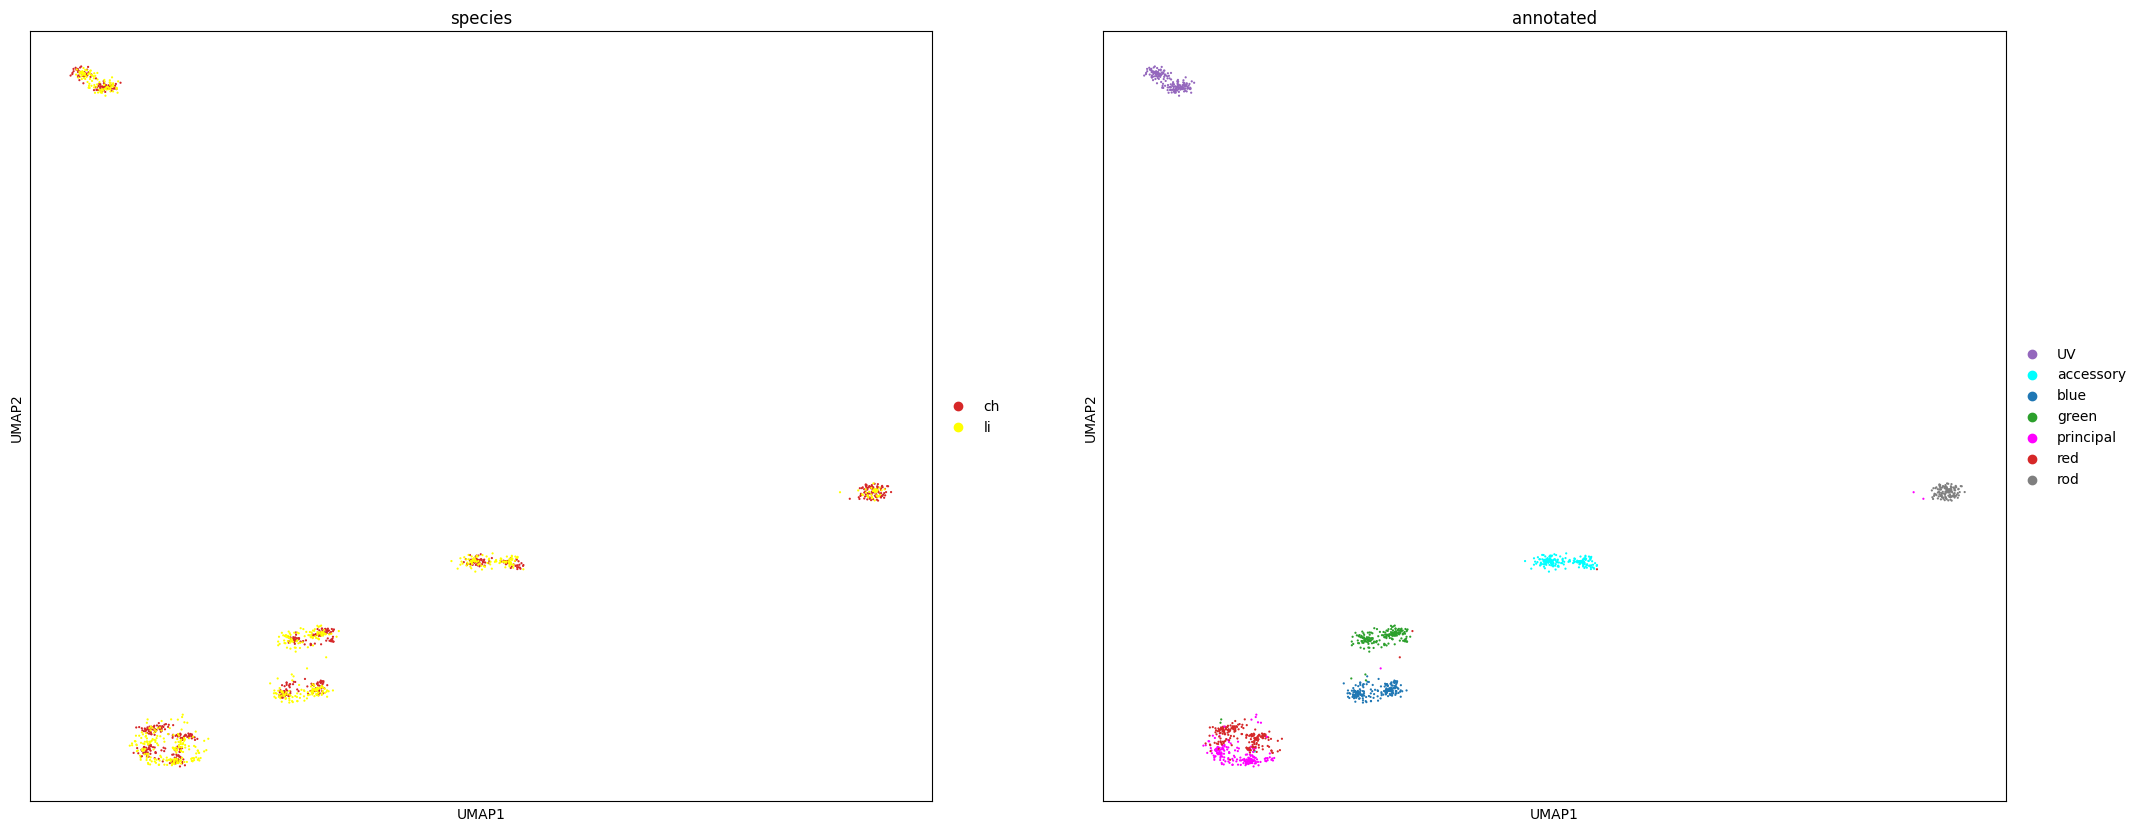

[None, None, None, None, None, None, None, None, None, None]

In [37]:
# sc.pl.umap(controlres[0][0].samap.adata, color=['annotated'])
# [PlotUMAP(controlres[i][0]) for i in range(0,nIter)]

In [38]:
# sm = controlres[0][0]
# # Save umap coordinates for plotting in R
# umap_summary = pd.DataFrame(sm.samap.adata.obsm['X_umap'])
# umap_summary['annotated'] = pd.Categorical(sm.samap.adata.obs['annotated'])
# umap_summary['species'] = pd.Categorical(sm.samap.adata.obs['species'])
# # umap_summary['leiden_clusters'] = pd.Categorical(sm.samap.adata.obs['leiden_clusters'])
# umap_summary.index = sm.samap.adata.obs.index
# umap_summary.to_csv('MappingTables/swap/umap_chli_double.csv')

## Remove chicken DCs

In [39]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_swapch, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

RUNNING SAM
Iteration: 0, Convergence: 1.0RUNNING SAM

Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8914633980942301
Iteration: 1, Convergence: 0.8921330944926713
Iteration: 1, Convergence: 0.8911032392995171
Iteration: 1, Convergence: 0.8906712328941204
Iteration: 1, Convergence: 0.8910924933811594
Iteration: 2, Convergence: 0.021296004200705893
Iteration: 2, Convergence: 0.021407034174895898
Iteration: 2, Convergence: 0.02312223093676776
Iteration: 2, Convergence: 0.02327905689218473
Elapsed time: 4.676903009414673 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.02249539114413313
Elapsed time: 5.785515546798706 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 6.325917959213257 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 7.3833088874816895 seconds
RUNNING SAM
Iteration: 0, Co

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.6714224815368652 minutes.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in ch:annotated.
Elapsed time: 0.6656246503194173 minutes.
Finding cluster-specific markers in ch:annotated.
Iteration: 1, Convergence: 0.8915734632937062
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 2, Convergence: 0.022278964660715574


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 2.9192512035369873 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.89015077344881


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.8929697470197551
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 2, Convergence: 0.023125234641937515
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8904350472854042
Iteration: 2, Convergence: 0.02119264323617282
Elapsed time: 7.280991554260254 seconds
Iteration: 2, Convergence: 0.02247916706164084
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 8.332049369812012 seconds
Iteration: 1, Convergence: 0.89216462789739
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 6.896250486373901 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8166961264043984
Iteration: 2, Convergence: 0.021864224210845145
Iteration: 1, Convergence: 0.8109690659276448
Iteration: 1, Convergence: 0.8164725043004911
Iteration: 1, Convergence: 0.8193708796446989
Iteration: 2, Convergence: 0.03378249912732997
Elapsed time: 41.81697726249695 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.040486497835953
Iteration: 2, Convergence: 0.0364302386735578
Iteration: 2, Convergen

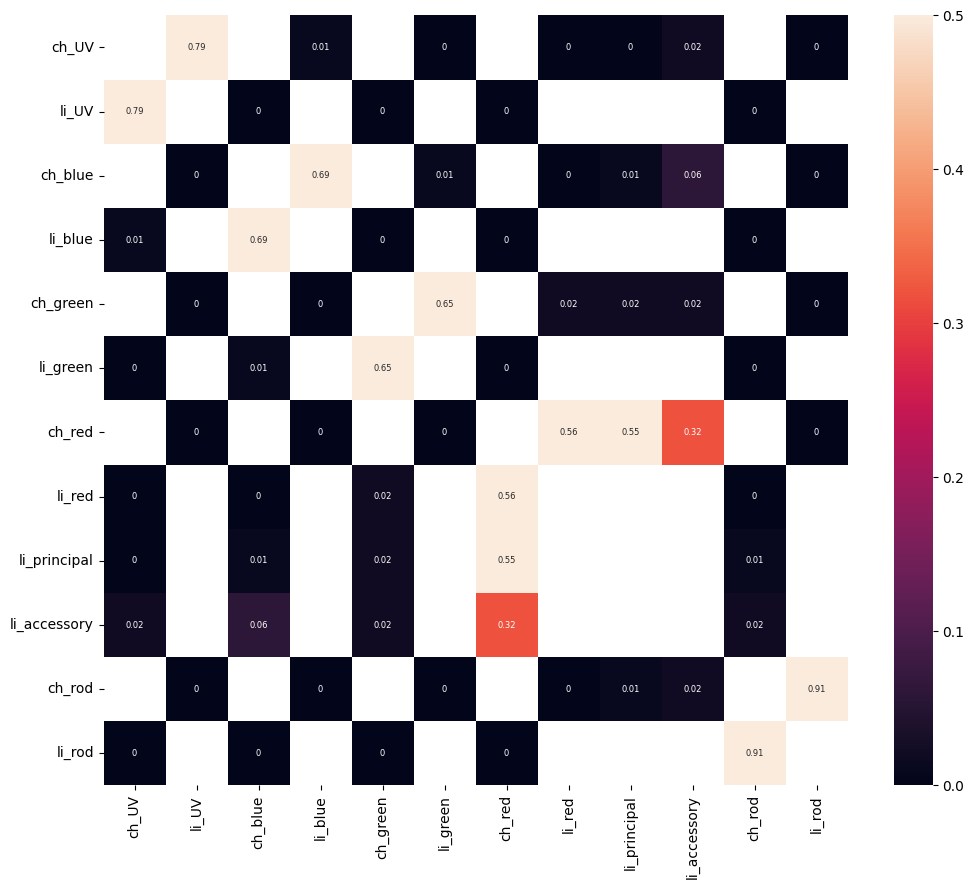

In [40]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap/chli_swapch')

## Remove lizard DCs

In [41]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_swapli, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8905016741272181
Iteration: 1, Convergence: 0.889892092989811
Iteration: 1, Convergence: 0.8910300408902931
Iteration: 1, Convergence: 0.8901029823127871
Iteration: 1, Convergence: 0.8901799650815478
Iteration: 2, Convergence: 0.01564421740444063
Iteration: 2, Convergence: 0.015632655205781058
Iteration: 2, Convergence: 0.01567520377614199
Iteration: 2, Convergence: 0.01543283531776686
Iteration: 2, Convergence: 0.016261696067672065
Elapsed time: 63.889466524124146 seconds
Elapsed time: 63.91720986366272 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 63.95930767059326 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 64.17138671875 seconds
Elapsed time: 64.21714115142822 

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.
Elapsed time: 0.661408011118571 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Finding cluster-specific markers in ch:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8910621439651656
Iteration: 1, Convergence: 0.8902354953106881
Iteration: 1, Convergence: 0.8915014518358996
Iteration: 1, Convergence: 0.890605885970532
Iteration: 1, Convergence: 0.8916619587011614
Iteration: 2, Convergence: 0.015447702546490196
Iteration: 2, Convergence: 0.015490362110389781
Iteration: 2, Convergence: 0.014712418618234595
Iteration: 2, Convergence: 0.015617598086178195
Elapsed time: 52.357513427734375 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.01453211122981126
Elapsed time: 58.67053818702698 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8276749306553584
Iteration: 1, Convergence: 0.8303582412277627
Iteration: 2, Convergence: 0.034970897738707624
Iteration: 2, Convergence: 0.03441615596658863
Elapsed time: 68.23552870750427 seconds
Iteration: 3, Convergence: 0.011677459296349859
RUNNING SAMElapsed time: 66.86213254928589 seco

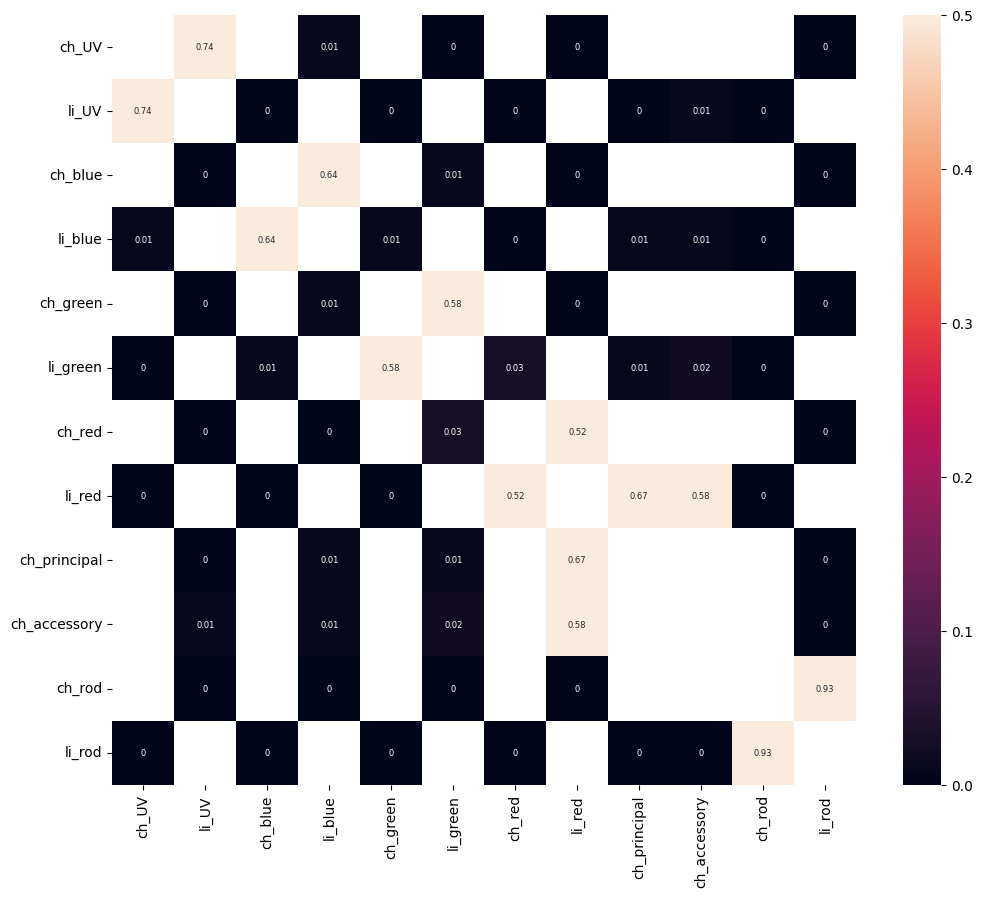

In [42]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap/chli_swapli')

## Remove chicken DC-A

In [43]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_noDCAch, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

RUNNING SAM
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8903980077415302
Iteration: 1, Convergence: 0.8898262065675634Iteration: 1, Convergence: 0.8898533581602788

Iteration: 1, Convergence: 0.890235018380379
Iteration: 1, Convergence: 0.889907181656296
Iteration: 2, Convergence: 0.019162323007907503
Iteration: 2, Convergence: 0.019375670784899615
Iteration: 2, Convergence: 0.018298773742067845
Iteration: 2, Convergence: 0.01940972020229336
Iteration: 2, Convergence: 0.019484171915071805
Elapsed time: 62.780755281448364 seconds
Elapsed time: 62.79933953285217 seconds
Elapsed time: 62.864293336868286 seconds
Elapsed time: 62.90038275718689 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 63.02337145805359 seconds
RUNNING SAM
Iteration: 0, Conv

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.8914315551806555


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.7091319759686788 minutes.
Elapsed time: 0.7087334632873535 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in ch:annotated.
Elapsed time: 0.71175031264623 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 2, Convergence: 0.0188695511959075
Iteration: 1, Convergence: 0.8891420757649612


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 22.378320932388306 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.019640065789611024
Iteration: 1, Convergence: 0.8906151136891635
Iteration: 1, Convergence: 0.8912334439127071
Iteration: 1, Convergence: 0.8910542516629945
Iteration: 1, Convergence: 0.8166659802345198
Elapsed time: 43.798060178756714 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.01849878001836034
Iteration: 2, Convergence: 0.01818992294030671
Iteration: 2, Convergence: 0.03394956808400256
Iteration: 2, Convergence: 0.01810310304896991
Iteration: 1, Convergence: 0.8109498352272921
Elapsed time: 59.245434522628784 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 64.90928196907043 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 3, Convergence: 0.011038089499447004
Elapsed time: 68.50085020065308 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence

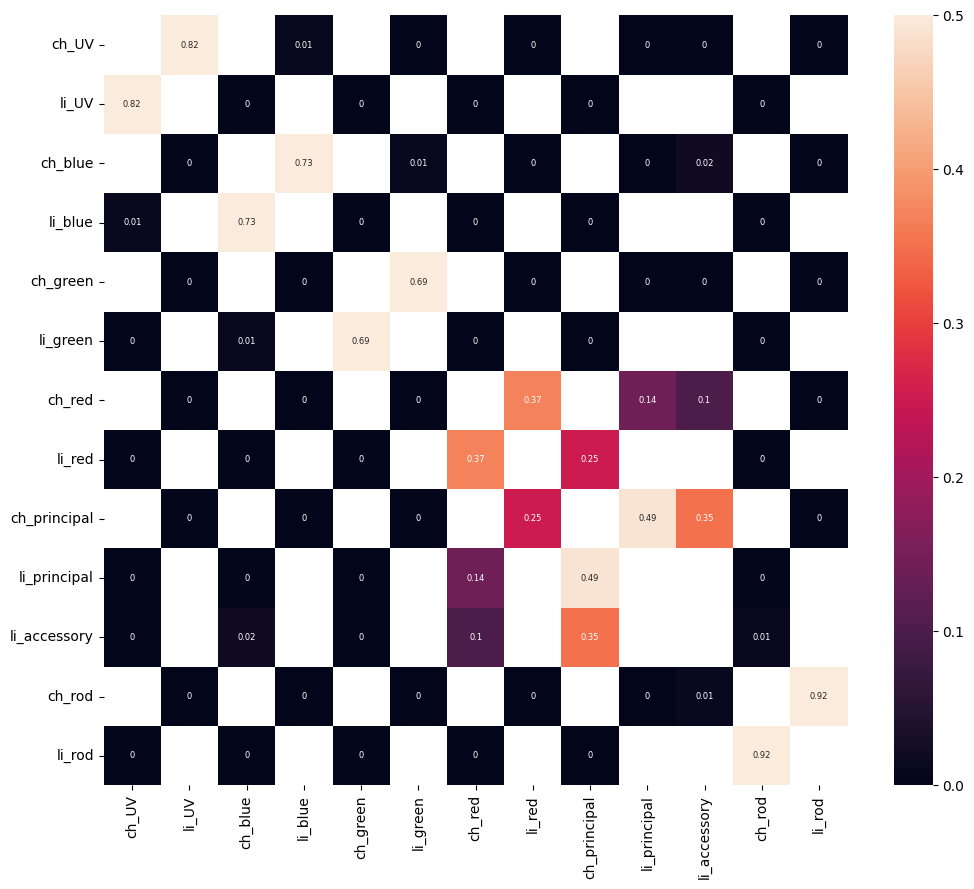

In [44]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap/chli_noDCAch')

## Remove lizard DC-A

In [45]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_noDCAli, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM




Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0



Iteration: 1, Convergence: 0.890178951282264Iteration: 1, Convergence: 0.890503336158384Iteration: 1, Convergence: 0.8898965626765571Iteration: 1, Convergence: 0.8910294068116104



Iteration: 1, Convergence: 0.8901029823127871
Iteration: 2, Convergence: 0.015715687593597434
Iteration: 2, Convergence: 0.015700166067382452
Iteration: 2, Convergence: 0.016248488977046508
Iteration: 2, Convergence: 0.015435622296582725
Iteration: 2, Convergence: 0.015632655205781058
Elapsed time: 64.36036944389343 seconds
Elapsed time: 64.36057877540588 seconds
Elapsed time: 64.71596908569336 seconds
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Elapsed time: 64.78278160095215 secondsRUNNING SAM

Iteration: 0, Convergence: 1.0
Elapsed time: 64.98670029640

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Rescaling edge weights by expression correlations.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Projecting data into joint latent space. 0.40579771995544434
Projecting data into joint latent space. 0.41060948371887207
RUNNING SAM
Iteration: 0, Convergence: 1.0
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
          ch       li
ch  0.000000  0.66404
li  0.692696  0.00000
Running UMAP on the stitched manifolds.
Correcting data with means. 0.4303107261657715
Finding cluster-specific markers in li:annotated.
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Correcting data with means. 0.5246002674102783
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Rescaling edge weights by expression correlations.
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
Concatenating SAM objects...          ch        li
ch  0.000000  0.655304
li  0.702856  0.000000

Iteration 3 complete.
Alignment scores:

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.015498604328719585
Elapsed time: 0.732142714659373 minutes.
Finding cluster-specific markers in ch:annotated.
Elapsed time: 0.7237558444341023 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Elapsed time: 0.7342207868893941 minutes.
Iteration: 1, Convergence: 0.8902354953106881
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 17.301761388778687 seconds


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])



Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 2, Convergence: 0.015447702546490196
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8915077632020446
Iteration: 1, Convergence: 0.8236713770144615
Iteration: 1, Convergence: 0.8906110581334129
Elapsed time: 36.373090982437134 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.891663319236937
Iteration: 2, Convergence: 0.01472060860922771
Iteration: 2, Convergence: 0.015632592872730822
Iteration: 2, Convergence: 0.03307225614198722
Iteration: 1, Convergence: 0.8209524689688439
Iteration: 2, Convergence: 0.014515302648652164
Elapsed time: 64.62837743759155 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 65.34039044380188 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 3, Convergence: 0.010969469396884545
Iteration: 2, Convergence: 0.03422467399162021
Elapsed time: 65.81933307647705 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 3, Convergence: 0.01114692771835533
Elapsed time: 8

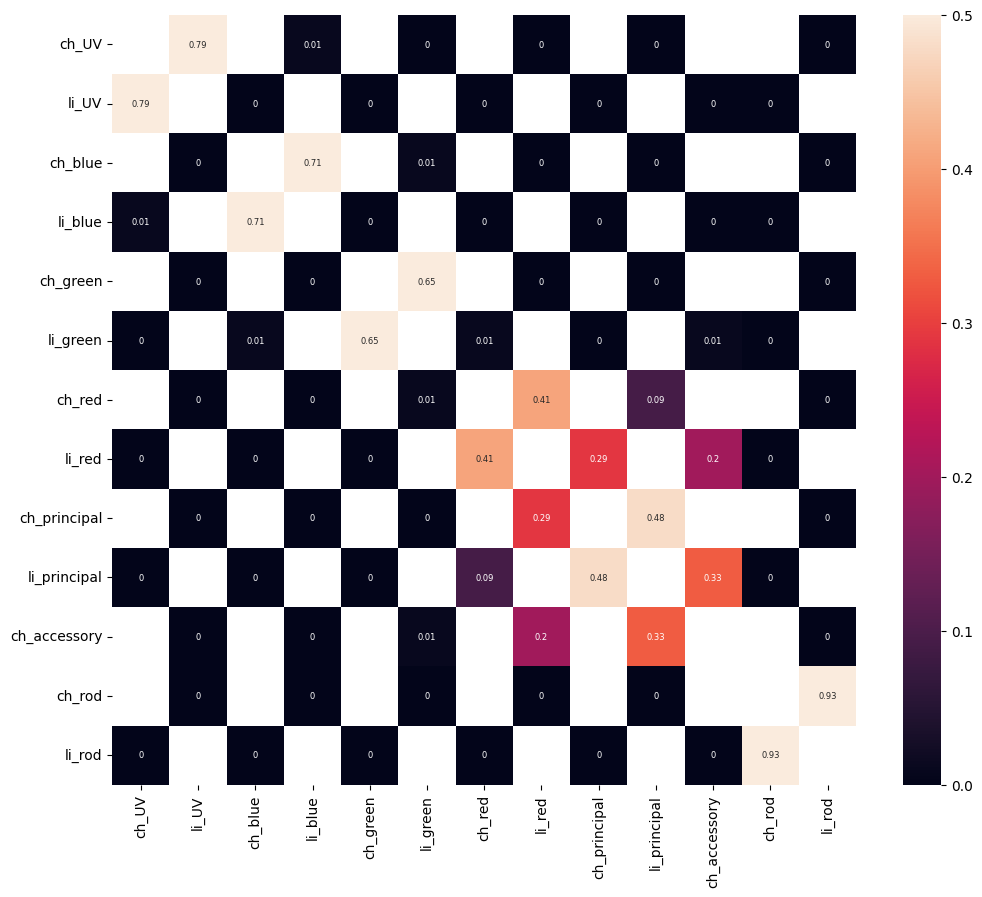

In [46]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap/chli_noDCAli')

# Swap experiments (no opsins)

In [6]:
path = '../../Species_Objects/Cone_Objects/updated/'
specieslist = ['Chicken', 'Lizard']
identlist = ['ch', 'li']
chli_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
chli_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
chli_swapch = my_dict = {'ch': path + 'Chicken_single.h5ad', 'li': path + 'Lizard_double.h5ad'}
chli_swapli = my_dict = {'ch': path + 'Chicken_double.h5ad', 'li': path + 'Lizard_single.h5ad'}
chli_noDCAch = my_dict = {'ch': path + 'Chicken_noDC-A.h5ad', 'li': path + 'Lizard_double.h5ad'}
chli_noDCAli = my_dict = {'ch': path + 'Chicken_double.h5ad', 'li': path + 'Lizard_noDC-A.h5ad'}
chli_noDCAch

{'ch': '../../Species_Objects/Cone_Objects/updated/Chicken_noDC-A.h5ad',
 'li': '../../Species_Objects/Cone_Objects/updated/Lizard_double.h5ad'}

## Chicken and lizard without DCs

In [48]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_single, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8859384756473587
Iteration: 1, Convergence: 0.8846257812391475
Iteration: 1, Convergence: 0.8850409598000947
Iteration: 1, Convergence: 0.8844365044044139
Iteration: 1, Convergence: 0.885073308152601
Iteration: 2, Convergence: 0.021079641947320826
Iteration: 2, Convergence: 0.023242780070851787
Iteration: 2, Convergence: 0.021470478847016427
Iteration: 2, Convergence: 0.022473385613316008
Iteration: 2, Convergence: 0.022401861110300892
Elapsed time: 5.309508323669434 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 6.159133434295654 seconds
Elapsed time: 6.230346918106079 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 6.455188274383545 seconds
Elapsed time: 6.60473322868

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.
Iteration: 1, Convergence: 0.8858139986445
Elapsed time: 0.6443722049395243 minutes.
Finding cluster-specific markers in ch:annotated.
Iteration: 2, Convergence: 0.022176202382202057


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 2.3782989978790283 seconds
Finding cluster-specific markers in li:annotated.
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0



/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.8261500819996597
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8837234444637937
Iteration: 1, Convergence: 0.8872382974333876
Iteration: 2, Convergence: 0.03370884095914995
Iteration: 2, Convergence: 0.023858400920783986
Iteration: 2, Convergence: 0.02075515001409689
Iteration: 3, Convergence: 0.010633965049596268
Iteration: 1, Convergence: 0.8842940223304895


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 5.458815097808838 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 5.731835842132568 seconds
Elapsed time: 4.881255388259888 seconds
Iteration: 2, Convergence: 0.021866467950094986
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 14.538767337799072 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8856821010756198
Iteration: 1, Convergence: 0.8238993717208983
Iteration: 1, Convergence: 0.824830258824673
Iteration: 1, Convergence: 0.8236858138047478
Iteration: 2, Convergence: 0.03332947376495686
Iteration: 2, Convergence: 0.03410448316721545
Iteration: 2, Convergence: 0.021694424223571405
Iteration: 3, Convergence: 0.011444993991779078
Iteration: 2, Convergence: 0.03496163480956099
Elapsed time: 39.07785129547119 seconds
Iteration: 3, Convergence: 0.010584994306338212RUNNING SAM

Iteration: 0, Convergence: 1.0
Elapsed time: 40.95917797088623 seconds
Iteration: 1, Convergence: 0

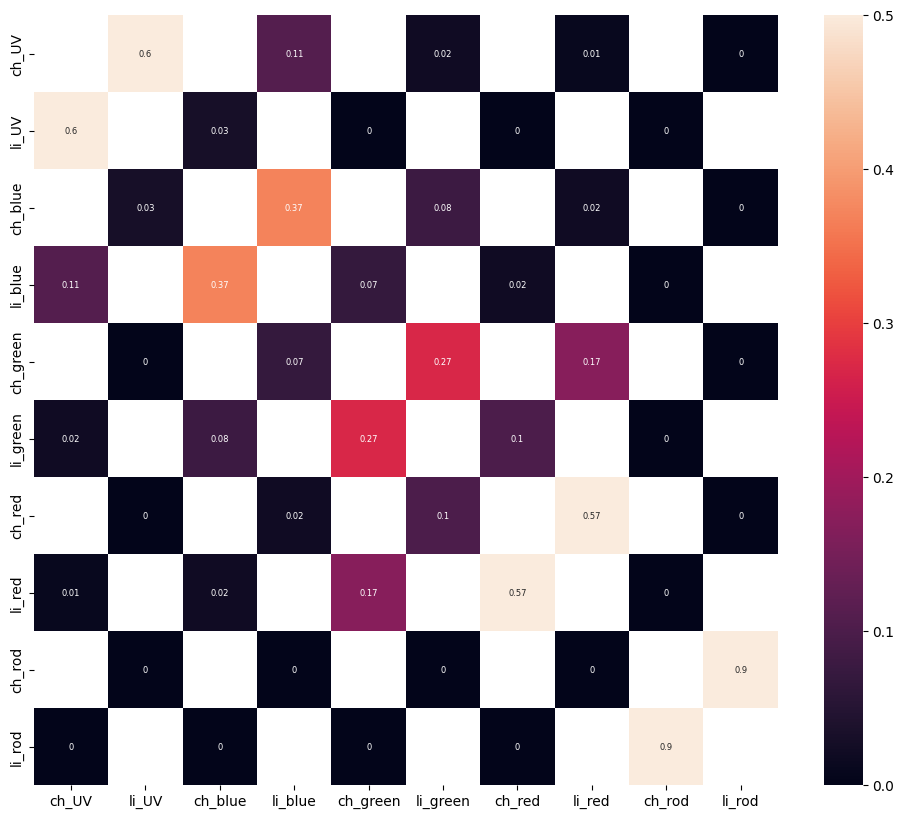

In [49]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_no_opsins/chli_single')

## Chicken and lizard with DCs

In [ ]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_double, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM









Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0








In [ ]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_no_opsins/chli_double')

## Remove chicken DCs

In [52]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_swapch, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0RUNNING SAM

Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
RUNNING SAM
Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

Iteration: 1, Convergence: 0.8850409598000947
Iteration: 1, Convergence: 0.8844365044044139
Iteration: 1, Convergence: 0.885073308152601
Iteration: 1, Convergence: 0.8846257812391475Iteration: 1, Convergence: 0.8859384756473587

Iteration: 2, Convergence: 0.021079641947320826
Iteration: 2, Convergence: 0.022473385613316008
Iteration: 2, Convergence: 0.022401861110300892
Iteration: 2, Convergence: 0.023242780070851787
Iteration: 2, Convergence: 0.021470478847016427
Elapsed time: 4.954137563705444 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 5.283422946929932 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 5.53060507774353 seconds
Elapsed time: 5.695518493652344 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Co

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8858139986445


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.8837234444637937


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 2, Convergence: 0.02218429804082344
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.023858400920783986


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 1, Convergence: 0.8872382974333876
Elapsed time: 4.062156438827515 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.401332378387451 seconds


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8856821010756198
Iteration: 1, Convergence: 0.8842940223304895
Iteration: 2, Convergence: 0.02075515001409689
Iteration: 2, Convergence: 0.021866467950094986
Iteration: 2, Convergence: 0.021694424223571405
Elapsed time: 9.367400169372559 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 11.529517889022827 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 13.360228061676025 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8111815065892749
Iteration: 1, Convergence: 0.8064045772041364
Iteration: 1, Convergence: 0.8150073035480015
Iteration: 1, Convergence: 0.8122740706350263
Iteration: 2, Convergence: 0.03834979575192684
Iteration: 1, Convergence: 0.8111918859562977
Iteration: 2, Convergence: 0.03316492218618528
Iteration: 2, Convergence: 0.031292186367944806
Iteration: 2, Convergence: 0.02884979931091662
Iteration

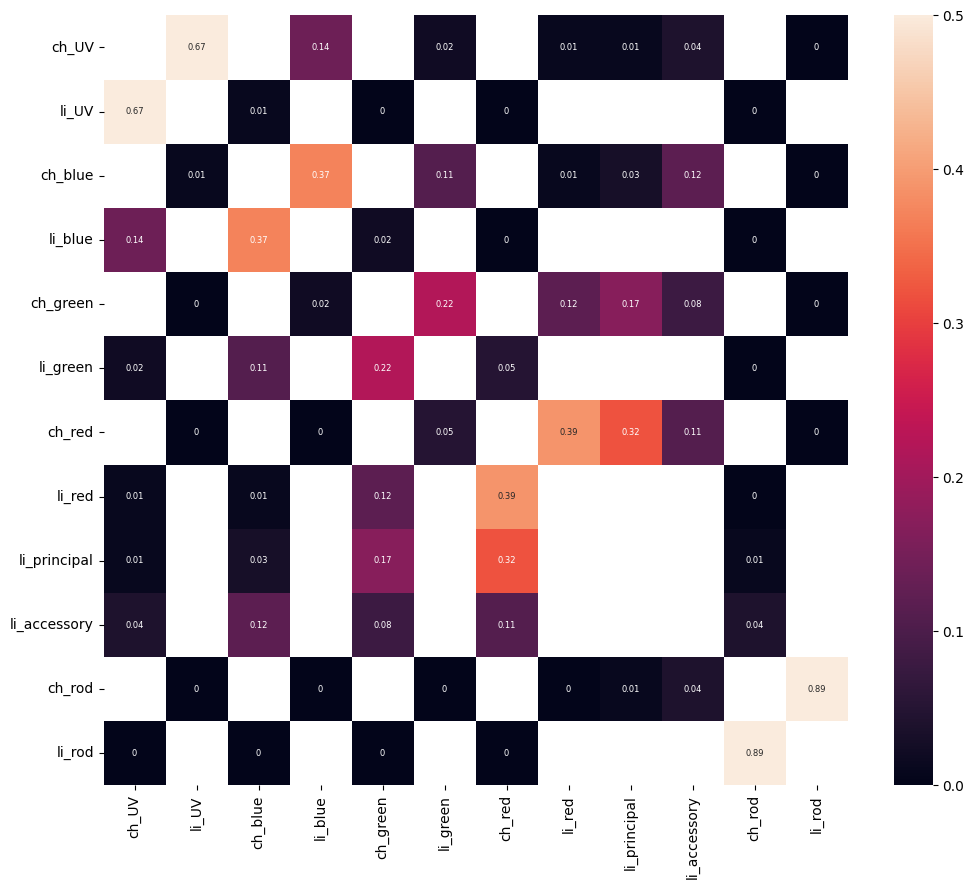

In [53]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_no_opsins/chli_swapch')

In [54]:
# Check genes
gene_pairs = controlres[0][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;UV to li;blue
Calculating gene pairs for the mapping: ch;blue to li;accessory
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;green to li;accessory
Calculating gene pairs for the mapping: ch;green to li;green
Calculating gene pairs for the mapping: ch;green to li;principal
Calculating gene pairs for the mapping: ch;green to li;red
Calculating gene pairs for the mapping: ch;red to li;principal
Calculating gene pairs for the mapping: ch;red to li;red
Calculating gene pairs for the mapping: ch;rod to li;rod


ch_UV;li_UV ch_UV;li_UV_pval1 ch_UV;li_UV_pval2  \
0       ch_NRXN3;li_NRXN3               0.0               0.0   
1   ch_PCDH11X;li_PCDH11X               0.0               0.0   
2         ch_TBX2;li_TBX2               0.0               0.0   
3        ch_FABP5;li_RBP1               0.0          0.000016   
4        ch_CDH12;li_CDH7               0.0          0.000365   
5         ch_FAT1;li_FAT1          0.001473               0.0   
6         ch_DCX;li_DCLK1               0.0          0.000001   
7       ch_PTPRS;li_PTPRD               0.0               0.0   
8         ch_NEBL;li_NEBL               0.0          0.000288   
9       ch_DCLK2;li_DCLK1               0.0          0.000001   
10        ch_NAV2;li_NAV2               0.0          0.003009   
11        ch_ENO1;li_ENO2          0.000001               0.0   
12    ch_FRMD4A;li_FRMD4A           0.00242          0.001045   
13    ch_LHFPL4;li_LHFPL3          0.001115          0.000069   
14       ch_CDH18;li_CDH7          0.002184          0.000365   
15                    NaN               NaN               NaN   
16                    NaN               NaN               NaN   
17                    NaN               NaN               NaN   
18                    NaN               NaN               NaN   
19                    NaN               NaN               NaN   
20                    NaN               NaN               NaN   
21                    NaN               NaN               NaN   
22                    NaN               NaN               NaN   
23                    NaN               NaN               NaN   
24                    NaN               NaN               NaN   

               ch_UV;li_blue ch_UV;li_blue_pval1 ch_UV;li_blue_pval2  \
0          ch_NTNG1;li_NTNG1                 0.0                 0.0   
1           ch_CDH12;li_CDH7                 0.0            0.000459   
2      ch_SLC27A6;li_SLC27A6                 0.0            0.003491   
3          ch_PTPRS;li_PTPRD                 0.0                 0.0   
4            ch_FAT1;li_FAT1            0.001473            0.000254   
5           ch_CDH18;li_CDH7            0.002184            0.000459   
6         ch_PARD3B;li_PARD3             0.00013            0.006121   
7   ch_CDH18;li_LOC132774511            0.002184            0.009751   
8                        NaN                 NaN                 NaN   
9                        NaN                 NaN                 NaN   
10                       NaN                 NaN                 NaN   
11                       NaN                 NaN                 NaN   
12                       NaN                 NaN                 NaN   
13                       NaN                 NaN                 NaN   
14                       NaN                 NaN                 NaN   
15                       NaN                 NaN                 NaN   
16                       NaN                 NaN                 NaN   
17                       NaN                 NaN                 NaN   
18                       NaN                 NaN                 NaN   
19                       NaN                 NaN                 NaN   
20                       NaN                 NaN                 NaN   
21                       NaN                 NaN                 NaN   
22                       NaN                 NaN                 NaN   
23                       NaN                 NaN                 NaN   
24                       NaN                 NaN                 NaN   

    ch_blue;li_accessory ch_blue;li_accessory_pval1  \
0    ch_SPOCK3;li_SPOCK3                        0.0   
1   ch_DLGAP1L;li_DLGAP1                   0.000041   
2    ch_LHFPL4;li_LHFPL3                   0.000077   
3      ch_MEIS2;li_MEIS1                   0.003571   
4                    NaN                        NaN   
5                    NaN                        NaN   
6                    NaN                        NaN   
7         

## Remove lizard DCs

In [55]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_swapli, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8841360254326048Iteration: 1, Convergence: 0.8837540446737371

Iteration: 1, Convergence: 0.8851274504311566
Iteration: 1, Convergence: 0.8845252325870152
Iteration: 1, Convergence: 0.8836988930587889
Iteration: 2, Convergence: 0.015631355645628824
Iteration: 2, Convergence: 0.016182505966972564
Iteration: 2, Convergence: 0.015673319325038695
Iteration: 2, Convergence: 0.0160865306461295
Iteration: 2, Convergence: 0.016199012672637327
Elapsed time: 63.66115593910217 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 63.82257151603699 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 64.65610480308533 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 64.82461428642273 seconds
RUNNING SAM
Iteration: 0, Co

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 0.7775065143903096 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Finding cluster-specific markers in ch:annotated.RUNNING SAM

Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.
Elapsed time: 0.6816581726074219 minutes.
Finding cluster-specific markers in ch:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8852216277207949


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8838822893981713
Iteration: 1, Convergence: 0.8849488199450348
Iteration: 2, Convergence: 0.01552870694953487
Iteration: 1, Convergence: 0.8844122027876037
Iteration: 1, Convergence: 0.8849131901458598
Iteration: 2, Convergence: 0.016498351623313288
Iteration: 2, Convergence: 0.015682898726784605
Elapsed time: 47.95956254005432 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.015515257669887449
Iteration: 1, Convergence: 0.8261500819996597
Elapsed time: 51.06554675102234 seconds
RUNNING SAMIteration: 2, Convergence: 0.03370884095914995

Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.015281705805908307
Iteration: 1, Convergence: 0.824830258824673
Iteration: 3, Convergence: 0.010633965049596268
Elapsed time: 58.3575439453125 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.03332947376495686
Elapsed time: 12.850207805633545 seconds
Iteration: 1

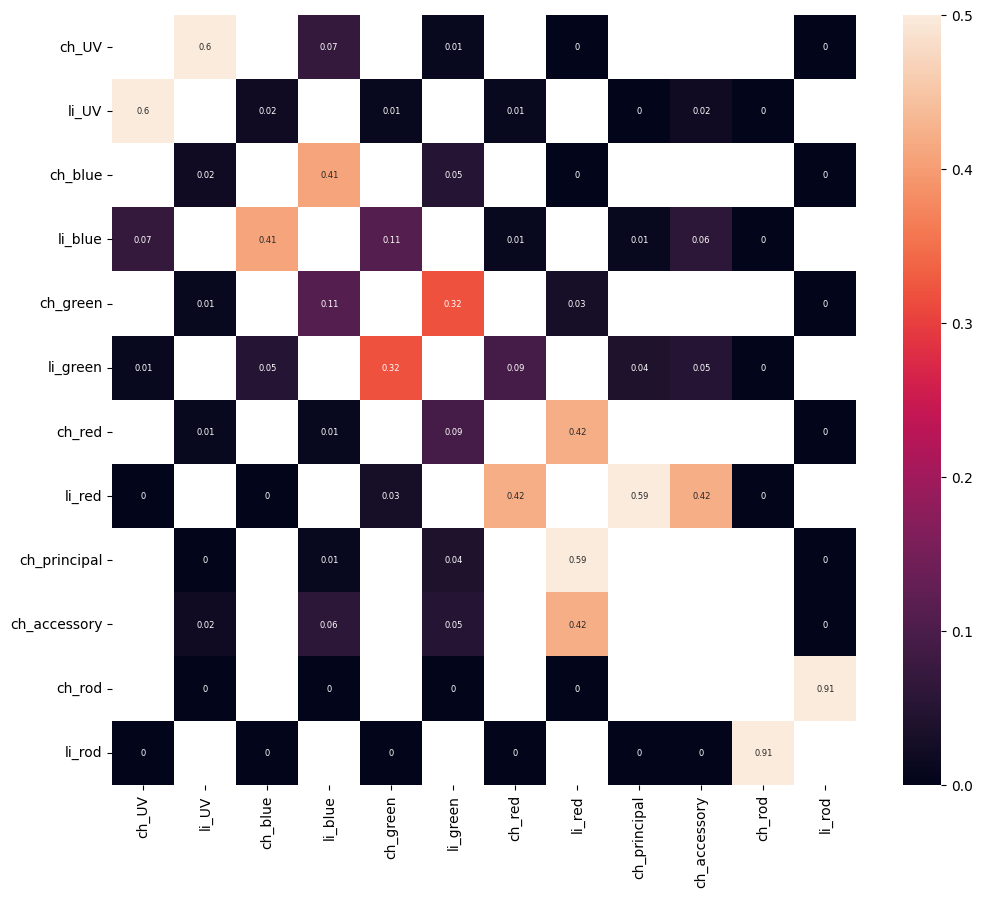

In [56]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_no_opsins/chli_swapli')

## Remove chicken DC-A

In [4]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_noDCAch, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM




Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0




Iteration: 1, Convergence: 0.8828165402399305
Iteration: 1, Convergence: 0.884283878824718
Iteration: 1, Convergence: 0.8840600616951645
Iteration: 1, Convergence: 0.8839101445179999
Iteration: 1, Convergence: 0.8841015937608236
Iteration: 2, Convergence: 0.01941815942423844
Iteration: 2, Convergence: 0.018688597070229424
Iteration: 2, Convergence: 0.018984377251416024
Iteration: 2, Convergence: 0.01900467270783424
Iteration: 2, Convergence: 0.018319544861610387
Elapsed time: 59.17300057411194 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 59.32779884338379 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 62.65128707885742 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 66.09377646446228 seconds
RUNNING SAM
Iteration: 0, Con

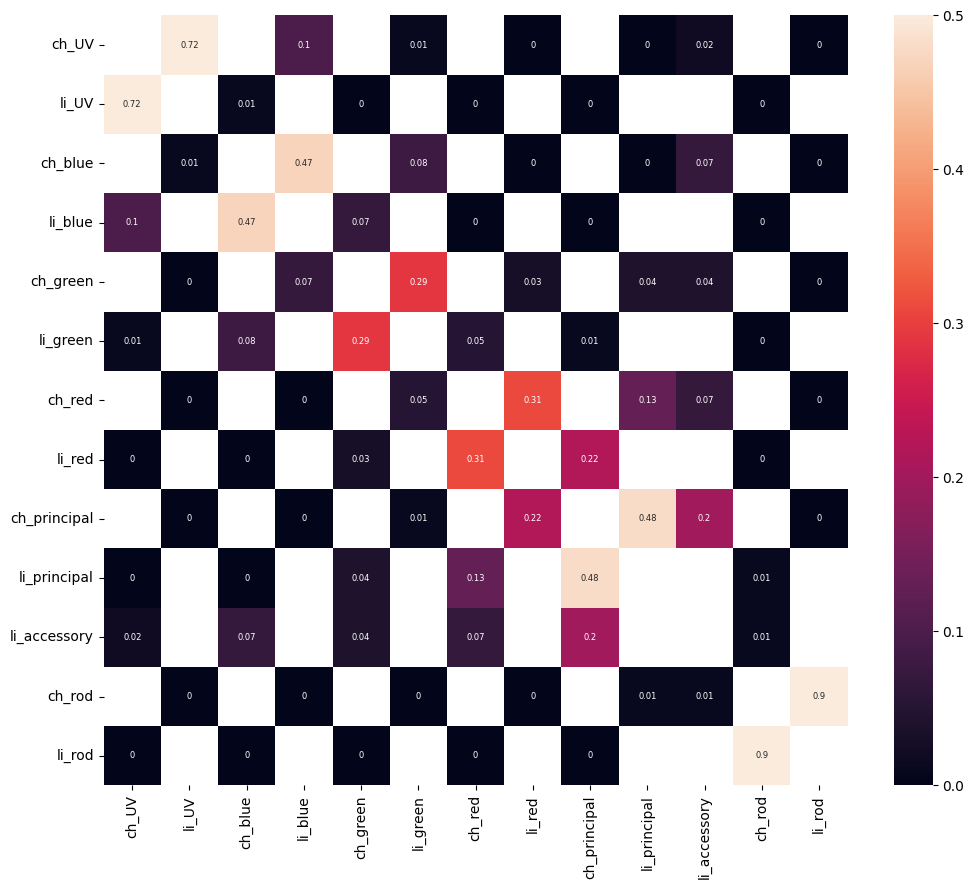

In [5]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_no_opsins/chli_noDCAch')

In [7]:
# Check genes
gene_pairs = controlres[1][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;green to li;green
Calculating gene pairs for the mapping: ch;principal to li;accessory
Calculating gene pairs for the mapping: ch;principal to li;principal
Calculating gene pairs for the mapping: ch;principal to li;red
Calculating gene pairs for the mapping: ch;red to li;red
Calculating gene pairs for the mapping: ch;rod to li;rod


ch_UV;li_UV ch_UV;li_UV_pval1 ch_UV;li_UV_pval2  \
0       ch_NRXN3;li_NRXN3               0.0               0.0   
1   ch_PCDH11X;li_PCDH11X               0.0               0.0   
2         ch_TBX2;li_TBX2               0.0               0.0   
3        ch_CDH12;li_CDH7               0.0          0.000002   
4        ch_FABP5;li_RBP1               0.0          0.000001   
5         ch_FAT1;li_FAT1          0.001527               0.0   
6         ch_NEBL;li_NEBL               0.0          0.000008   
7         ch_DCX;li_DCLK1               0.0               0.0   
8       ch_PTPRS;li_PTPRD               0.0               0.0   
9       ch_TENM1;li_TENM4          0.000104          0.000378   
10        ch_NAV2;li_NAV2               0.0          0.000118   
11      ch_DCLK2;li_DCLK1               0.0               0.0   
12    ch_LHFPL4;li_LHFPL3          0.000135               0.0   
13    ch_FRMD4A;li_FRMD4A           0.00002          0.009124   
14        ch_ENO1;li_ENO2          0.004134          0.000004   
15    ch_SORBS2;li_SORBS2          0.000006          0.000101   
16          ch_BSG;li_BSG          0.001707          0.005827   
17        ch_GRM8;li_GRM8               0.0               0.0   
18                    NaN               NaN               NaN   
19                    NaN               NaN               NaN   
20                    NaN               NaN               NaN   
21                    NaN               NaN               NaN   
22                    NaN               NaN               NaN   
23                    NaN               NaN               NaN   
24                    NaN               NaN               NaN   
25                    NaN               NaN               NaN   
26                    NaN               NaN               NaN   
27                    NaN               NaN               NaN   
28                    NaN               NaN               NaN   
29                    NaN               NaN               NaN   
30                    NaN               NaN               NaN   

         ch_blue;li_blue ch_blue;li_blue_pval1 ch_blue;li_blue_pval2  \
0      ch_NTNG1;li_NTNG1                   0.0                   0.0   
1        ch_NFIB;li_NFIB                   0.0                   0.0   
2    ch_SPOCK3;li_SPOCK3                   0.0              0.006893   
3      ch_PTPRS;li_PTPRD              0.000001                   0.0   
4      ch_MAGI1;li_MAGI2              0.000446              0.000343   
5   ch_DLGAP1L;li_DLGAP1              0.000128              0.009147   
6     ch_PARD3B;li_PARD3              0.004213               0.00641   
7    ch_ADGRL3;li_ADGRL2              0.000923              0.009734   
8                    NaN                   NaN                   NaN   
9                    NaN                   NaN                   NaN   
10                   NaN                   NaN                   NaN   
11                   NaN                   NaN                   NaN   
12                   NaN                   NaN                   NaN   
13                   NaN                   NaN                   NaN   
14                   NaN                   NaN                   NaN   
15                   NaN                   NaN                   NaN   
16                   NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
18                   NaN                   NaN                   NaN   
19                   NaN                   NaN                   NaN   
20                   NaN                   NaN                   NaN   
21                   NaN                   NaN                   NaN   
22                   NaN                   NaN                   NaN   
23                   NaN                   NaN                   NaN   
24                   NaN                   NaN                   NaN   
25                   NaN                   NaN               

## Remove lizard DC-A

In [8]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_noDCAli, gnnm, plot = False, seed = seed, remove_genes=opsins, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0RUNNING SAM

Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8836988930587889
Iteration: 1, Convergence: 0.8845252325870152
Iteration: 1, Convergence: 0.8851266705256953
Iteration: 1, Convergence: 0.8837508362127
Iteration: 1, Convergence: 0.8841352681411758
Iteration: 2, Convergence: 0.016199012672637327
Iteration: 2, Convergence: 0.015673319325038695
Iteration: 2, Convergence: 0.016049395914551342
Iteration: 2, Convergence: 0.01621451044098839
Iteration: 2, Convergence: 0.015660763580241863
Elapsed time: 61.04756236076355 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 61.852142095565796 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 63.188254833221436 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 67.03729057312012 seconds
RUNNING SAM
Iteration: 0, Co

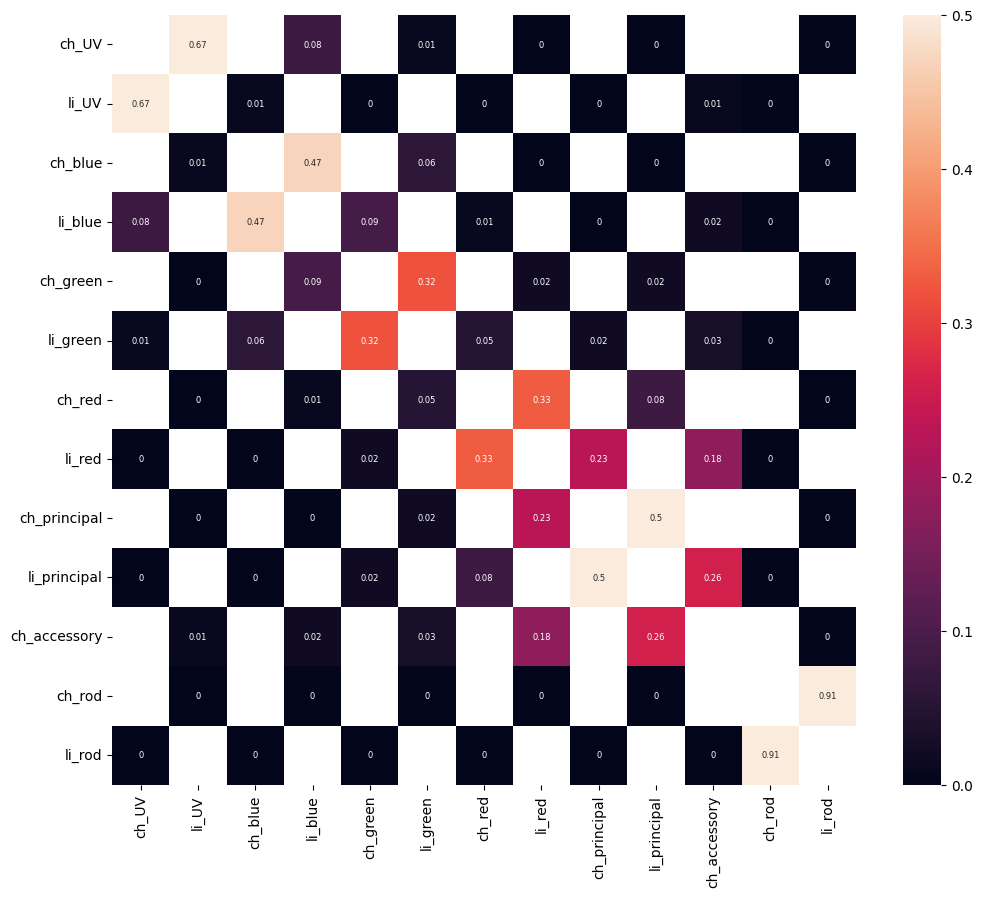

In [9]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_no_opsins/chli_noDCAli')

In [11]:
# Check genes
gene_pairs = controlres[0][2].find_all(align_thr=0.10)
gene_pairs

Calculating gene pairs for the mapping: ch;UV to li;UV
Calculating gene pairs for the mapping: ch;UV to li;blue
Calculating gene pairs for the mapping: ch;accessory to li;principal
Calculating gene pairs for the mapping: ch;accessory to li;red
Calculating gene pairs for the mapping: ch;blue to li;blue
Calculating gene pairs for the mapping: ch;green to li;green
Calculating gene pairs for the mapping: ch;principal to li;principal
Calculating gene pairs for the mapping: ch;principal to li;red
Calculating gene pairs for the mapping: ch;red to li;red
Calculating gene pairs for the mapping: ch;rod to li;rod


ch_UV;li_UV ch_UV;li_UV_pval1 ch_UV;li_UV_pval2  \
0           ch_NRXN3;li_NRXN3               0.0               0.0   
1       ch_PCDH11X;li_PCDH11X               0.0               0.0   
2             ch_TBX2;li_TBX2               0.0               0.0   
3            ch_FABP5;li_RBP1               0.0          0.000078   
4             ch_FAT1;li_FAT1          0.000718               0.0   
5            ch_CDH12;li_CDH7               0.0          0.000721   
6             ch_DCX;li_DCLK1               0.0          0.000001   
7           ch_PTPRS;li_PTPRD               0.0               0.0   
8             ch_NEBL;li_NEBL               0.0          0.001821   
9           ch_DCLK2;li_DCLK1               0.0          0.000001   
10        ch_LHFPL4;li_LHFPL3          0.000182               0.0   
11          ch_MAGI1;li_MAGI1          0.008216               0.0   
12  ch_LOC101749175;li_LHFPL3          0.004218               0.0   
13                        NaN               NaN               NaN   
14                        NaN               NaN               NaN   
15                        NaN               NaN               NaN   
16                        NaN               NaN               NaN   
17                        NaN               NaN               NaN   
18                        NaN               NaN               NaN   
19                        NaN               NaN               NaN   
20                        NaN               NaN               NaN   
21                        NaN               NaN               NaN   
22                        NaN               NaN               NaN   
23                        NaN               NaN               NaN   
24                        NaN               NaN               NaN   
25                        NaN               NaN               NaN   
26                        NaN               NaN               NaN   
27                        NaN               NaN               NaN   
28                        NaN               NaN               NaN   
29                        NaN               NaN               NaN   

            ch_UV;li_blue ch_UV;li_blue_pval1 ch_UV;li_blue_pval2  \
0       ch_NTNG1;li_NTNG1                 0.0                 0.0   
1       ch_PTPRS;li_PTPRD                 0.0                 0.0   
2         ch_FAT1;li_FAT1            0.000718            0.001125   
3   ch_SLC27A6;li_SLC27A6                 0.0            0.009143   
4        ch_CDH12;li_CDH7                 0.0            0.000932   
5         ch_NFIB;li_NFIB            0.004432                 0.0   
6      ch_PARD3B;li_PARD3            0.000019            0.003334   
7       ch_MYO3A;li_MYO3A            0.008342            0.000364   
8       ch_MAGI1;li_MAGI2            0.008216              0.0002   
9                     NaN                 NaN                 NaN   
10                    NaN                 NaN                 NaN   
11                    NaN                 NaN                 NaN   
12                    NaN                 NaN                 NaN   
13                    NaN                 NaN                 NaN   
14                    NaN                 NaN                 NaN   
15                    NaN                 NaN                 NaN   
16                    NaN                 NaN                 NaN   
17                    NaN                 NaN                 NaN   
18                    NaN                 NaN                 NaN   
19                    NaN                 NaN                 NaN   
20                    NaN                 NaN                 NaN   
21                    NaN                 NaN                 NaN   
22                    NaN                 NaN                 NaN   
23                    NaN                 NaN                 NaN   
24                    NaN                 NaN                 NaN   
25                    NaN                 NaN                 NaN   
26             

# Swap experiments (TFs AnimalTFDB)

In [61]:
path = '../../Species_Objects/Cone_Objects/only_tfs_animaldb/'
specieslist = ['Chicken', 'Lizard']
identlist = ['ch', 'li']
chli_single = dict((identlist[i], path + species + '_single.h5ad') for i, species in enumerate(specieslist))
chli_double = dict((identlist[i], path + species + '_double.h5ad') for i, species in enumerate(specieslist))
chli_swapch = my_dict = {'ch': path + 'Chicken_single.h5ad', 'li': path + 'Lizard_double.h5ad'}
chli_swapli = my_dict = {'ch': path + 'Chicken_double.h5ad', 'li': path + 'Lizard_single.h5ad'}
chli_noDCAch = my_dict = {'ch': path + 'Chicken_noDC-A.h5ad', 'li': path + 'Lizard_double.h5ad'}
chli_noDCAli = my_dict = {'ch': path + 'Chicken_double.h5ad', 'li': path + 'Lizard_noDC-A.h5ad'}
chli_noDCAch

{'ch': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Chicken_noDC-A.h5ad',
 'li': '../../Species_Objects/Cone_Objects/only_tfs_animaldb/Lizard_double.h5ad'}

## Chicken and lizard without DCs

In [62]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_single, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0

RUNNING SAM
RUNNING SAMIteration: 0, Convergence: 1.0

Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7440468803832593Iteration: 1, Convergence: 0.749371635371735Iteration: 1, Convergence: 0.7518196354130988

Iteration: 1, Convergence: 0.7491624683648741

Iteration: 1, Convergence: 0.7491071424386401
Iteration: 2, Convergence: 0.06302242364877289Iteration: 2, Convergence: 0.06043617168833525

Iteration: 2, Convergence: 0.06033727567195561
Iteration: 2, Convergence: 0.0582039950471688Iteration: 2, Convergence: 0.06074050398311757

Iteration: 3, Convergence: 0.02003397118358396
Iteration: 3, Convergence: 0.02070664202705399
Iteration: 3, Convergence: 0.021271459789385196
Iteration: 3, Convergence: 0.020159641046202336
Iteration: 3, Convergence: 0.020896209432390178
Elapsed time: 4.0590574741363525 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 0.5807719826698303 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 1, Convergence: 0.7454800999626975
Iteration: 1, Convergence: 0.751387180496594
Iteration: 2, Convergence: 0.06705702280781557


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.06372776988844252Iteration: 3, Convergence: 0.020784913690402994

Iteration: 1, Convergence: 0.7470929919500768
Elapsed time: 0.5663618882497151 minutes.
Finding cluster-specific markers in ch:annotated.
Elapsed time: 2.4655449390411377 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 3, Convergence: 0.021239121420190736
Finding cluster-specific markers in li:annotated.
Iteration: 2, Convergence: 0.06779783244124714
Iteration: 1, Convergence: 0.7463856775390041


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 3.9221198558807373 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.045848473914827007
Iteration: 3, Convergence: 0.023180480562255325
Iteration: 1, Convergence: 0.7441050314115967
Elapsed time: 0.585039476553599 minutes.
Finding cluster-specific markers in ch:annotated.
Iteration: 1, Convergence: 0.7453952467780489
Iteration: 3, Convergence: 0.015826059009030603
Iteration: 4, Convergence: 0.010575491017321317
Iteration: 2, Convergence: 0.06465104405622617
Finding cluster-specific markers in li:annotated.
Iteration: 2, Convergence: 0.048102834848898546
Elapsed time: 5.567598819732666 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 3, Convergence: 0.020529577409207724


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 5.0413360595703125 seconds
Iteration: 3, Convergence: 0.017415764815349014
Elapsed time: 4.45843243598938 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7477782097601186
Iteration: 1, Convergence: 0.7493852716685279
Iteration: 1, Convergence: 0.7529652180640226
Elapsed time: 8.486405849456787 seconds
Iteration: 2, Convergence: 0.06546094029158422
Iteration: 2, Convergence: 0.047838240890926184
Iteration: 2, Convergence: 0.05145977654182285
Not updating the manifold...
Iteration: 3, Convergence: 0.021032494332828836
Iteration: 3, Convergence: 0.015443176400226622
Iteration: 3, Convergence: 0.015903060657886513
Elapsed time: 20.22770857810974 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Not updating the manifold...
Elapsed time: 21.083001375198364 seconds
Not updating the manifold...
1252 `ch` gene symbols match between the datasets and the BLAST graph.
1886 `li` gene symbols match between the

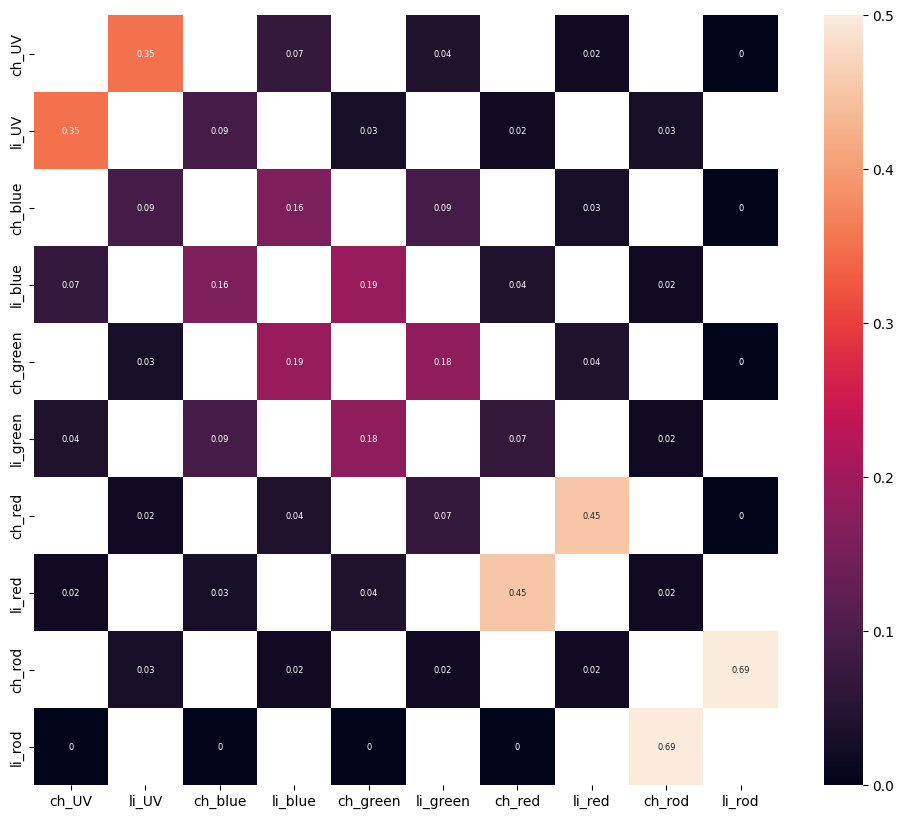

In [63]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_animaltfdb/chli_single')

## Chicken and lizard with DCs

In [64]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_double, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM


Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7431349808718686
Iteration: 1, Convergence: 0.7385141474766154
Iteration: 1, Convergence: 0.7412470435604273
Iteration: 1, Convergence: 0.7458517372161809
Iteration: 1, Convergence: 0.7418625566477238
Iteration: 2, Convergence: 0.06345827200979903
Iteration: 2, Convergence: 0.06502481141002853
Iteration: 2, Convergence: 0.06298530165824598
Iteration: 2, Convergence: 0.067549321925073
Iteration: 2, Convergence: 0.06320778603142932
Iteration: 3, Convergence: 0.019950884404785315
Iteration: 3, Convergence: 0.02049414580360615
Iteration: 3, Convergence: 0.020369247874951195
Iteration: 3, Convergence: 0.019717306741922607
Iteration: 3, Convergence: 0.021225770949445184
Elapsed time: 76.7733108997345 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
E

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Projecting data into joint latent space. 0.21403717994689941
Projecting data into joint latent space.Correcting data with means.Rescaling edge weights by expression correlations.
  0.19338202476501465
0.052973270416259766
Prepping datasets for translation.
Translating feature spaces pairwise.
Expanding neighbourhoods of species ch...Correcting data with means.
 Expanding neighbourhoods of species li...
0.07135772705078125Indegree coarsening

Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Rescaling edge weights by expression correlations.
Projecting data into joint latent space. 0.55110764503479
Correcting data with means. 0.16051363945007324
Expanding neighbourhoods of species ch...
Concatenating SAM objects...
Expanding neighbourhoods of species li...Iteration 2 complete.
Alignment scores:

          ch        li
ch  0.000000  0.382759
li  0.383211  0.000000
Calculating gene-gene correl

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 0.6820262153943379 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 1, Convergence: 0.7263836098828589


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7465793639696835
Iteration: 1, Convergence: 0.7393092605093173
Iteration: 1, Convergence: 0.739066163474439
Iteration: 1, Convergence: 0.7367234580929324
Iteration: 2, Convergence: 0.048727373726335454
Iteration: 2, Convergence: 0.06756458498349881
Iteration: 2, Convergence: 0.0713496690859184
Iteration: 2, Convergence: 0.06549248970130145
Iteration: 3, Convergence: 0.016059021222462517
Iteration: 2, Convergence: 0.06610644681841789
Iteration: 3, Convergence: 0.020256987477612693
Iteration: 3, Convergence: 0.02306762717643394
Iteration: 3, Convergence: 0.021449592773049152
Elapsed time: 69.77156496047974 seconds
Iteration: 3, Convergence: 0.020779441747273756
Elapsed time: 69.8630838394165 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 80.3057975769043 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7247950101609901
Not updating the manifold...Elapsed time: 87.21514

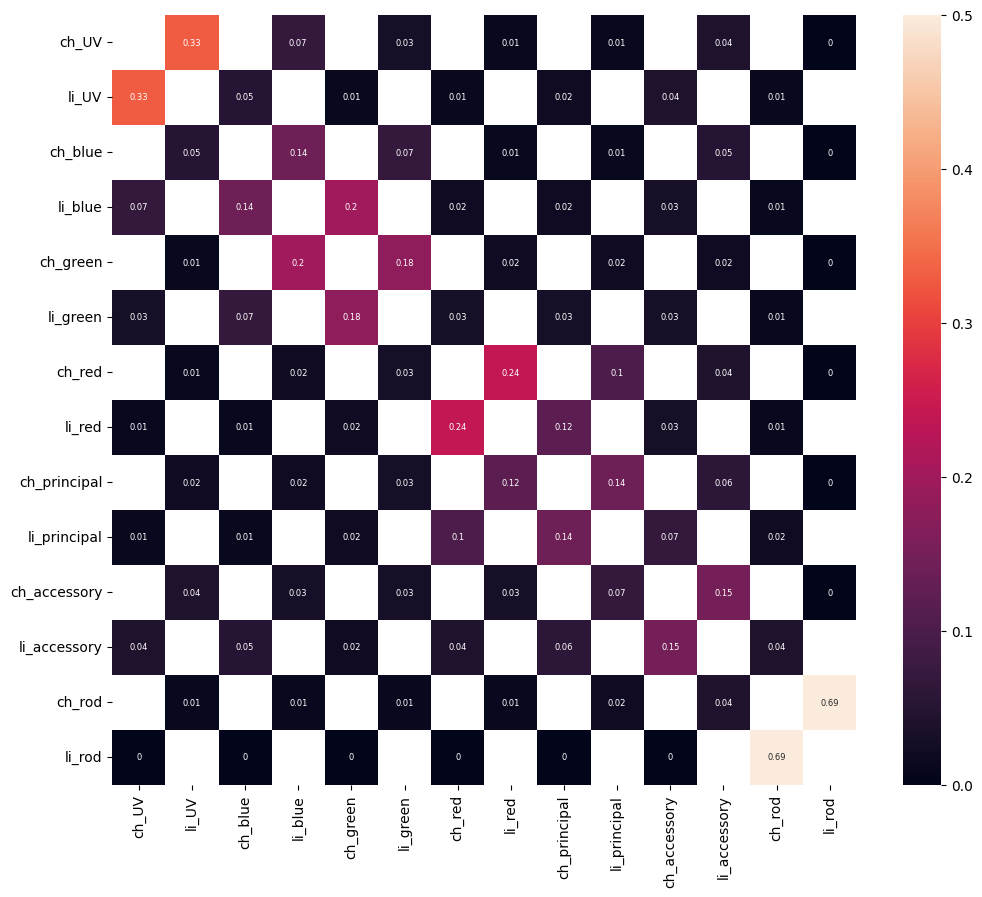

In [65]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_animaltfdb/chli_double')

## Remove chicken DCs

In [66]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_swapch, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAM


Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7491624683648741Iteration: 1, Convergence: 0.7518196354130988

Iteration: 1, Convergence: 0.7491071424386401
Iteration: 1, Convergence: 0.749371635371735
Iteration: 1, Convergence: 0.7440468803832593
Iteration: 2, Convergence: 0.06043617168833525
Iteration: 2, Convergence: 0.06033727567195561
Iteration: 2, Convergence: 0.0582039950471688
Iteration: 2, Convergence: 0.06074050398311757
Iteration: 2, Convergence: 0.06302242364877289
Iteration: 3, Convergence: 0.020159641046202336
Iteration: 3, Convergence: 0.02070664202705399
Iteration: 3, Convergence: 0.02003397118358396
Iteration: 3, Convergence: 0.020896209432390178
Elapsed time: 5.105585813522339 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 5.423505544662476 seconds
RUNNING S

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7454800999626975
Iteration: 2, Convergence: 0.06705702280781557
Iteration: 3, Convergence: 0.020784913690402994
Elapsed time: 1.7960922718048096 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.6332499225934346 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Elapsed time: 0.6523425261179606 minutes.
Finding cluster-specific markers in ch:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.
Iteration: 1, Convergence: 0.7263836098828589
Iteration: 1, Convergence: 0.751387180496594


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.06372776988844252
Iteration: 1, Convergence: 0.7470929919500768
Iteration: 3, Convergence: 0.021239121420190736
Elapsed time: 0.6036278367042541 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Iteration: 2, Convergence: 0.06779783244124714
Elapsed time: 0.6222909251848857 minutes.
Elapsed time: 4.9615092277526855 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in ch:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Finding cluster-specific markers in li:annotated.Iteration: 0, Convergence: 1.0

Iteration: 2, Convergence: 0.048727373726335454


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 3, Convergence: 0.023180480562255325Iteration: 0, Convergence: 1.0

Iteration: 1, Convergence: 0.7441050314115967
Iteration: 1, Convergence: 0.7493852716685279
Iteration: 4, Convergence: 0.010575491017321317
Iteration: 2, Convergence: 0.06546094029158422
Elapsed time: 11.3943190574646 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.06465104405622617
Iteration: 3, Convergence: 0.021032494332828836
Iteration: 3, Convergence: 0.020529577409207724
Elapsed time: 13.642450094223022 seconds
Iteration: 1, Convergence: 0.7247950101609901
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 3, Convergence: 0.016059021222462517
Elapsed time: 20.8428955078125 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7243364308837134
Iteration: 2, Convergence: 0.04891650020584701
Iteration: 1, Convergence: 0.7352010235500153
Elapsed time: 46.08917450904846 seconds
Iteration: 1, Convergence: 0.7322837983448622
Iteration: 2

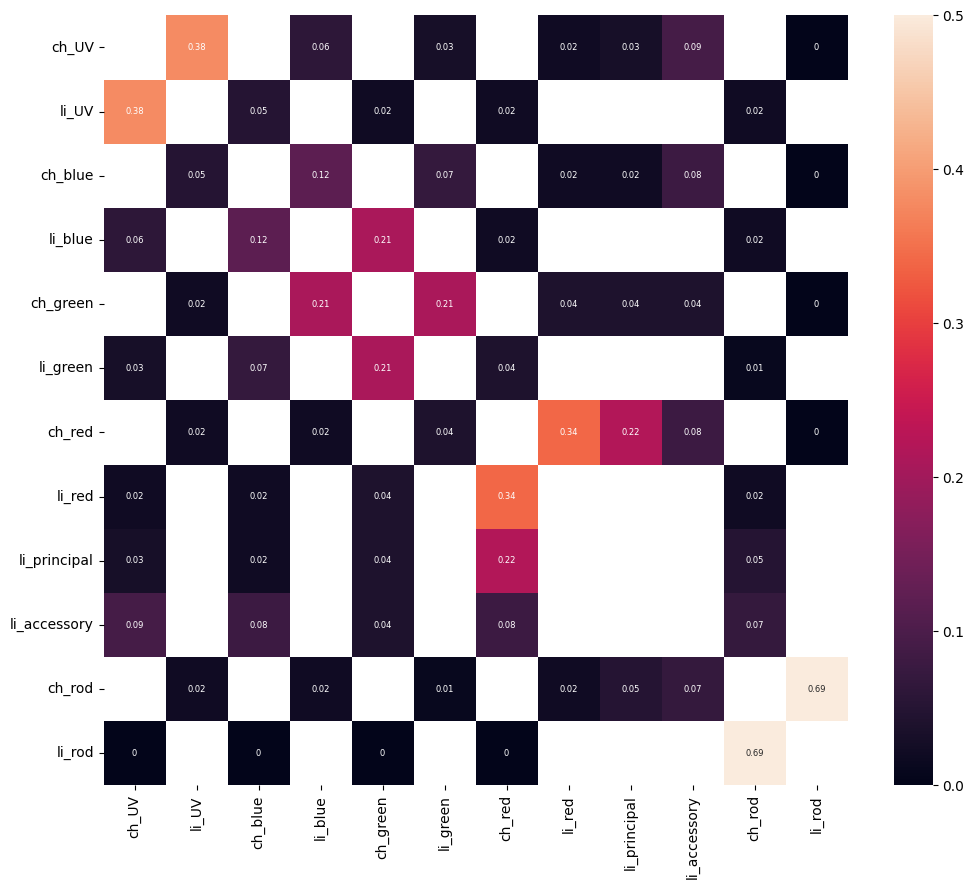

In [67]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_animaltfdb/chli_swapch')

## Remove lizard DCs

In [68]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_swapli, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM




Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0



Iteration: 1, Convergence: 0.7458517372161809
Iteration: 1, Convergence: 0.7431349808718686
Iteration: 1, Convergence: 0.7412470435604273
Iteration: 1, Convergence: 0.7418625566477238
Iteration: 1, Convergence: 0.7385141474766154
Iteration: 2, Convergence: 0.06345827200979903
Iteration: 2, Convergence: 0.06502481141002853
Iteration: 2, Convergence: 0.06298530165824598
Iteration: 2, Convergence: 0.06320778603142932
Iteration: 2, Convergence: 0.067549321925073
Iteration: 3, Convergence: 0.02049414580360615
Iteration: 3, Convergence: 0.020362848180829028
Iteration: 3, Convergence: 0.019950884404785315
Iteration: 3, Convergence: 0.021225770949445184
Iteration: 3, Convergence: 0.019717306741922607
Elapsed time: 81.93602538108826 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Translating feature spaces pairwise.
Prepping datasets for translation.
Translating feature spaces pairwise.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Projecting data into joint latent space. 0.1693570613861084
Correcting data with means. 0.03688812255859375
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Projecting data into joint latent space. 0.3263120651245117
Rescaling edge weights by expression correlations.
Correcting data with means. 0.06729578971862793
Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Concatenating SAM objects...
Rescaling edge weights by expression correlations.
Iteration 3 complete.
Alignment scores:
         ch        li
ch  0.00000  0.437281
li  0.44091  0.000000
Running UMAP on the stitched manifolds.
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
          ch        li
ch  0.000000  0.422703
li  0.437357  0.000000
Running UMAP on the stitched manifolds.
Iteration: 1, Convergence: 0.7412786074338351
Elapsed time: 0.7049441774686177

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 2, Convergence: 0.06719798605656575
Elapsed time: 0.6576739192008972 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.6410727540651957 minutes.
Finding cluster-specific markers in ch:annotated.
Elapsed time: 0.6716334501902262 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7465793639696835
Iteration: 3, Convergence: 0.02114738498222224
Iteration: 1, Convergence: 0.7393092605093173
Iteration: 2, Convergence: 0.06756458498349881
Iteration: 1, Convergence: 0.7367234580929324
Iteration: 1, Convergence: 0.7390619200512192
Elapsed time: 37.5430212020874 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7463856775390041
Iteration: 2, Convergence: 0.045848473914827007
Iteration: 3, Convergence: 0.015826059009030603
Iteration: 2, Convergence: 0.0713496690859184
Elapsed time: 13.555541276931763 seconds
Iteration: 3, Convergence: 0.020256987477612693
Iteration: 2, Convergence: 0.06549248970130145
Iteration: 2, Convergence: 0.06608259043380531
Not updating the manifold...
Iteration: 3, Convergence: 0.02306762717643394
Elapsed time: 68.22135066986084 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Not updating the manifold...
1252 `ch` gene symbols match between t

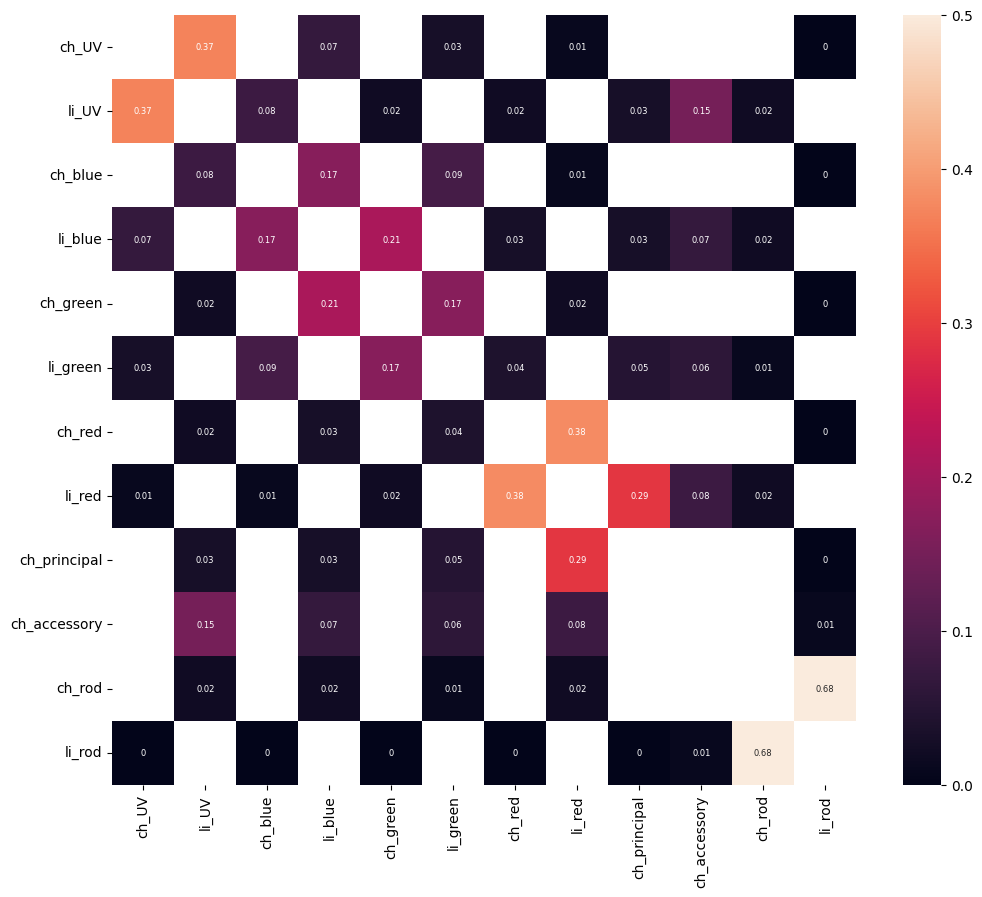

In [69]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_animaltfdb/chli_swapli')

## Remove chicken DC-A

In [70]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_noDCAch, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAM


RUNNING SAMIteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0


Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7477366352526071
Iteration: 1, Convergence: 0.7505467035794122
Iteration: 1, Convergence: 0.7472012551415815
Iteration: 1, Convergence: 0.7425641452958146
Iteration: 1, Convergence: 0.7476786171638915
Iteration: 2, Convergence: 0.06036784357201611
Iteration: 2, Convergence: 0.06329517394832486
Iteration: 2, Convergence: 0.05969975985538404
Iteration: 2, Convergence: 0.06423044825411411
Iteration: 2, Convergence: 0.0638614558451296
Iteration: 3, Convergence: 0.018814205409963317
Iteration: 3, Convergence: 0.01980303358272363
Iteration: 3, Convergence: 0.018404095905320918
Iteration: 3, Convergence: 0.01973280534655776
Iteration: 3, Convergence: 0.022433993501399487
Elapsed time: 78.21432518959045 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Projecting data into joint latent space. 0.20393657684326172


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Correcting data with means. 0.046860456466674805
RUNNING SAM
Iteration: 0, Convergence: 1.0
Rescaling edge weights by expression correlations.
Expanding neighbourhoods of species ch...Concatenating SAM objects...

Expanding neighbourhoods of species li...
Iteration 2 complete.Indegree coarsening

Alignment scores:
          ch        li
ch  0.000000  0.403158
li  0.399859  0.000000
Calculating gene-gene correlations in the homology graph...
Rescaling edge weights by expression correlations.Prepping datasets for translation.

Translating feature spaces pairwise.
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
Projecting data into joint latent space.          ch        li
ch  0.000000  0.419587
li  0.403011  0.000000Prepping datasets for translation.

 0.4393880367279053
Translating feature spaces pairwise.
Correcting data with means. 0.07700181007385254
Running UMAP on the stitched manifolds.
Concatenating SAM objects...
Iteration 3 complete.Expanding neighbourhoods

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 0.6339899698893229 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Finding cluster-specific markers in ch:annotated.
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 0.6488297343254089 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Finding cluster-specific markers in ch:annotated.
RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.
Elapsed time: 13.047437906265259 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7480334591280731
Iteration: 1, Convergence: 0.7440898386303216
Iteration: 1, Convergence: 0.7263836098828589
Iteration: 1, Convergence: 0.7414608368573223
Iteration: 1, Convergence: 0.7444823424575722
Iteration: 2, Convergence: 0.06507980116330686
Iteration: 2, Convergence: 0.06149460388568272
Iteration: 2, Convergence: 0.070729016538578
Iteration: 2, Convergence: 0.048727373726335454
Iteration: 2, Convergence: 0.06490388407725521
Iteration: 3, Convergence: 0.01929191368203305
Iteration: 3, Convergence: 0.021037731657980063
Iteration: 3, Convergence: 0.02381339609593907
Iteration: 3, Convergence: 0.016059021222462517
Iteration: 3, Convergence: 0.020968310576183705
Elapsed time: 77.78227734565735 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 82.03223013877869 seconds
Elapsed time: 82.36327528953552 secondsElapsed time: 80.61722612380981 seconds

RUNNING SAM
Iteration: 0, Convergence: 1.0RUNNING SA

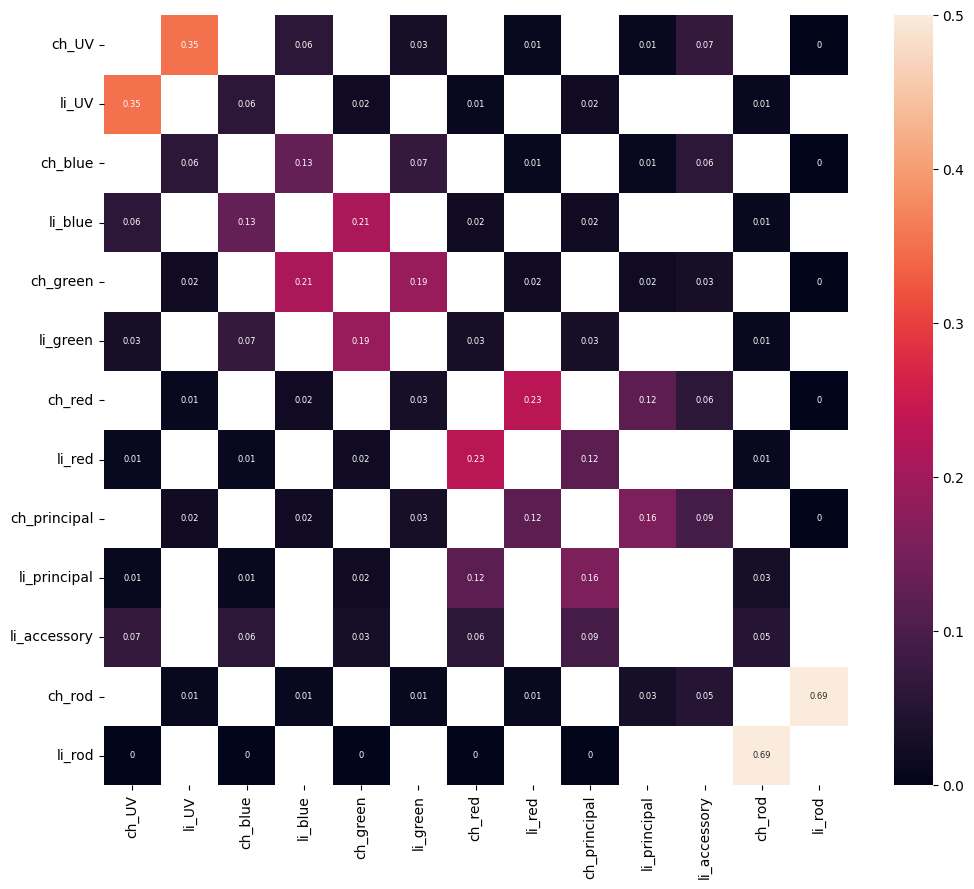

In [71]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_animaltfdb/chli_noDCAch')

## Remove lizard DC-A

In [72]:
def wrapper(seed, downsample):
    return SAMapTrial(chli_noDCAli, gnnm, plot = False, seed = seed, downsample = downsample)

if __name__ == '__main__':
    with Pool(processes=nprocess) as p:
        controlres = p.starmap(wrapper, zip(range(nIter), repeat(100)))

/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://an

RUNNING SAMRUNNING SAMRUNNING SAMRUNNING SAM



Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0Iteration: 0, Convergence: 1.0



RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7431270659250543
Iteration: 1, Convergence: 0.7418625566477238
Iteration: 1, Convergence: 0.7412470435604273
Iteration: 1, Convergence: 0.7458517372161809
Iteration: 1, Convergence: 0.7385141474766154
Iteration: 2, Convergence: 0.06347612952633849
Iteration: 2, Convergence: 0.06502481141002853
Iteration: 2, Convergence: 0.06298530165824598
Iteration: 2, Convergence: 0.067549321925073
Iteration: 2, Convergence: 0.06320778603142932
Iteration: 3, Convergence: 0.021225770949445184
Iteration: 3, Convergence: 0.02049414580360615
Iteration: 3, Convergence: 0.019717306741922607
Iteration: 3, Convergence: 0.019891949335340633
Iteration: 3, Convergence: 0.020369247874951195
Elapsed time: 79.00832200050354 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Concatenating SAM objects...
Iteration 2 complete.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Alignment scores:
          ch        li
ch  0.000000  0.409631
li  0.404394  0.000000
Calculating gene-gene correlations in the homology graph...
RUNNING SAM
Iteration: 0, Convergence: 1.0
Prepping datasets for translation.
Concatenating SAM objects...
Translating feature spaces pairwise.
Iteration 3 complete.
Alignment scores:
          ch        li
ch  0.000000  0.401304
li  0.404036  0.000000
Projecting data into joint latent space. 0.18356776237487793
Correcting data with means. 0.05461883544921875Running UMAP on the stitched manifolds.

Expanding neighbourhoods of species ch...
Expanding neighbourhoods of species li...
Indegree coarsening
Rescaling edge weights by expression correlations.
Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 0.48501133918762207
Concatenating SAM objects...
Iteration 3 complete.
Alignment scores:
Correcting data with means.          ch       li
ch  0.000000  0.42208
li  0.416026  0.00000 


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.6780057390530904 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.
Elapsed time: 0.6429097215334575 minutes.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Finding cluster-specific markers in ch:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapsed time: 0.6991108735402425 minutes.
Finding cluster-specific markers in ch:annotated.
Finding cluster-specific markers in li:annotated.


/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])
/clusterfs/kslab/Evolution/paper_2/projects/cones/../../utils/DarioFunctions.py:169: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_downsampled = adatas[0].concatenate(*adatas[1:])


Elapsed time: 18.38292098045349 seconds
RUNNING SAMRUNNING SAM

Iteration: 0, Convergence: 1.0
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7465793639696835
Iteration: 1, Convergence: 0.7393092605093173
Iteration: 1, Convergence: 0.7367234580929324
Iteration: 1, Convergence: 0.7392623521080974
Iteration: 1, Convergence: 0.739066163474439
Iteration: 2, Convergence: 0.06756458498349881
Iteration: 2, Convergence: 0.0713496690859184
Iteration: 2, Convergence: 0.06549248970130145
Iteration: 2, Convergence: 0.045410010889508946
Iteration: 2, Convergence: 0.06610644681841789
Iteration: 3, Convergence: 0.020256987477612693
Iteration: 3, Convergence: 0.02306762717643394
Iteration: 3, Convergence: 0.021449592773049152
Iteration: 3, Convergence: 0.015530399151178556
Iteration: 3, Convergence: 0.020779441747273756
Elapsed time: 82.2024245262146 seconds
Elapsed time: 84.80221748352051 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
RUNNING SAM
Iteration: 0, Convergence: 1.0
Elapse

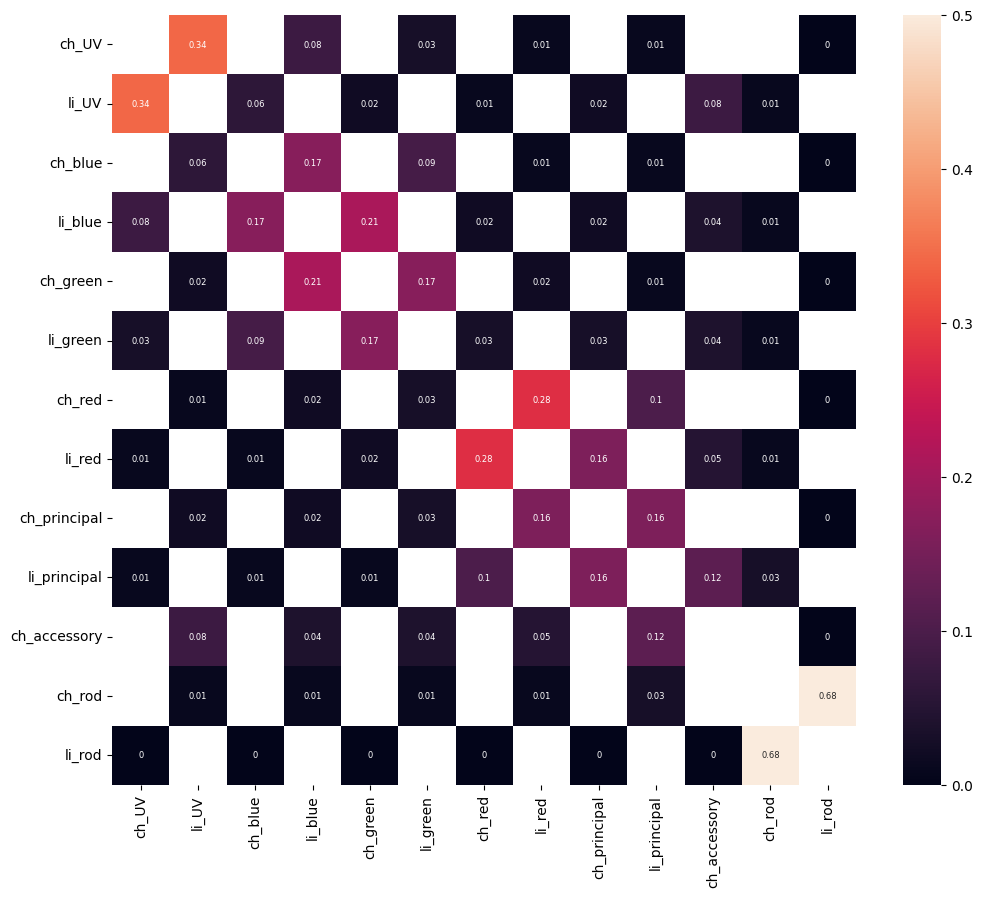

In [73]:
# element-wise mean
MeanTable(controlres, vmax = 0.5)
SaveTables(controlres, 'MappingTables/swap_animaltfdb/chli_noDCAli')

In [74]:
raise KeyboardInterrupt

KeyboardInterrupt: 

# Figure 4: joint PCA

In [ ]:
sm = samap.utils.load_samap('../../../storage/samap/pkl/zechlisqhs_double_res_2.samap')
ze_expr, ch_expr, ze_trans, homology_matrix = translate_feature_space(sm, "ze", "ch", scale = True)
li_expr, ch_expr, li_trans, homology_matrix = translate_feature_space(sm, "li", "ch", scale = True)
merged = standardize_expression_matrices([ch_expr, li_trans, ze_trans], ids = ['ch','li','ze'])
pca_coords = PlotPCA(merged, binary = -0.15)
pca_coords.to_csv('MappingTable/pca_coords.csv')